In [2]:
import warnings
warnings.filterwarnings('ignore')
import importlib
import numpy as np
from gaus_vertex_pd_mix import *
import time


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits import mplot3d
from matplotlib.pyplot import cm

In [2]:
# create dictionaries for aksim, mil gyroid phase coeffcicents
# replace coefficients with values from gyroid dictionary
# generate phase diagrams for each system, see which is more accurate

# Choose gyroid representation

In [3]:
# aks_dict = {"g3": -(1/6)  * (1/(12*np.sqrt(12))) * 48
#             "g3_2": (1/6) * (1/(6*np.sqrt(6))) * 48
#             "g3_mix": -(1/6) * (1/(12*np.sqrt(6))) * 24 
#             "g4":
#             "g4_2"
#             "g4_mix1":
#             "g4_mix2":}
# TYPE = "aks"

# if TYPE == "aks":
#     gyr_dict = aks_dict
    
# elif TYPE == "mil":
#     gyr_dict = mil_dict

In [4]:
# N = 10000

# chi_array = np.arange(8, 30, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N
# M = 10
# M_arr = [M]
# N_m = N/M
# b = 1


# fa_array = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
# poly_type = "diblock"
# n_p = 1

# FA1 = 0.4
# FA2 = 0.6

# poly_mat1, dens = poly_mat_gen(poly_type, M, n_p, FA1) 
# poly_mat2, dens = poly_mat_gen(poly_type, M, n_p, FA2) 
# mx1 = Mix(poly_mat1, dens, M_arr, N_m, b)
# mx2 = Mix(poly_mat2, dens, M_arr, N_m, b)

# print(mx1.q_star)
# print(mx2.q_star)
# q_star = mx1.q_star
# q_star = q_star[0]
# sq_6 = (1/np.sqrt(6)) * q_star
# gyr_q1 = sq_6*np.array([-1, 2, 1])
# gyr_q2 = sq_6*np.array([2, 1, -1])
# gyr_q3 = sq_6*np.array([1, -1, 2])
# gyr_q4 = sq_6*np.array([2, -1, -1])
# gyr_q5 = sq_6*np.array([-1, 2, -1])
# gyr_q6 = sq_6*np.array([-1, -1, 2])

# gyr_q7 = sq_6*np.array([2, 1, 1])
# gyr_q8 = sq_6*np.array([1, 2, 1])
# gyr_q9 = sq_6*np.array([1, 1, 2])
# gyr_q10 = sq_6*np.array([2, -1, 1])
# gyr_q11 = sq_6*np.array([1, 2, -1])
# gyr_q12 = sq_6*np.array([-1, 1, 2])

# gyr_q1_2 = sq_6*np.array([2, 2, 0])
# gyr_q2_2 = sq_6*np.array([2, 0, 2])
# gyr_q3_2 = sq_6*np.array([0, 2, 2])
# gyr_q4_2 = sq_6*np.array([-2, 2, 0])
# gyr_q5_2 = sq_6*np.array([-2, 0, 2])
# gyr_q6_2 = sq_6*np.array([0, -2, 2])

# #AKS

# gyr_g3_1 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  *  gamma3_E(mx1, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
# gyr_g3_2_1 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx1, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
# gyr_g3_mix_1 = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx1, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) 

# gyr_g3_2 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  *  gamma3_E(mx2, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
# gyr_g3_2_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx2, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
# gyr_g3_mix_2 = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx2, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) 

# print("FA=0.4:")
# print(gyr_g3_1)
# print(gyr_g3_2_1)
# print(gyr_g3_mix_1)

# print("FA = 0.6:")
# print(gyr_g3_2)
# print(gyr_g3_2_2)
# print(gyr_g3_mix_2)

# mono AB diblock

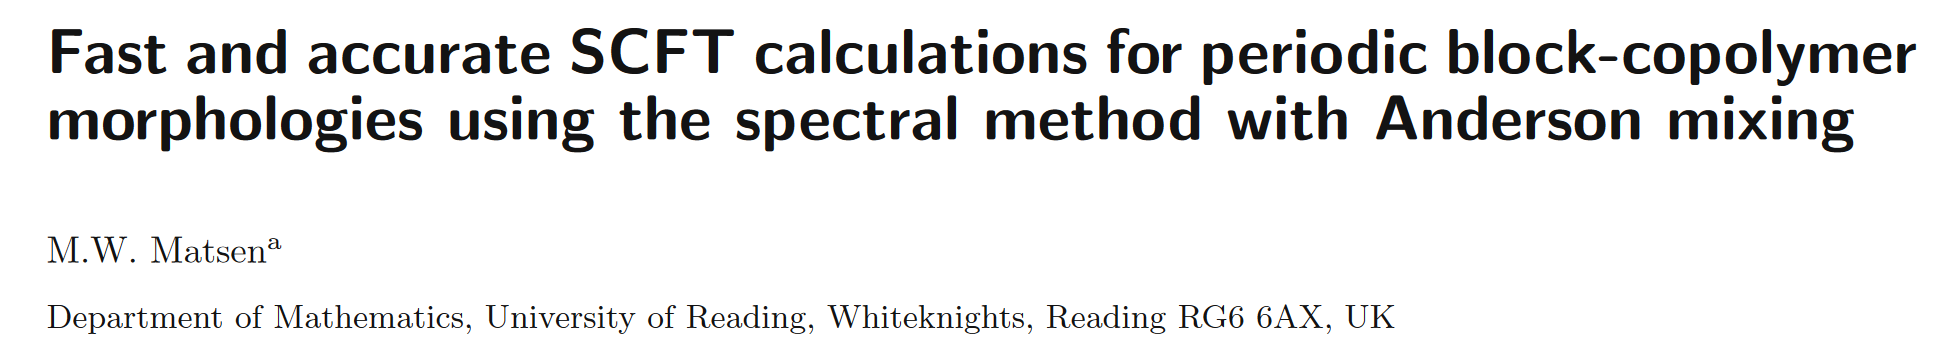

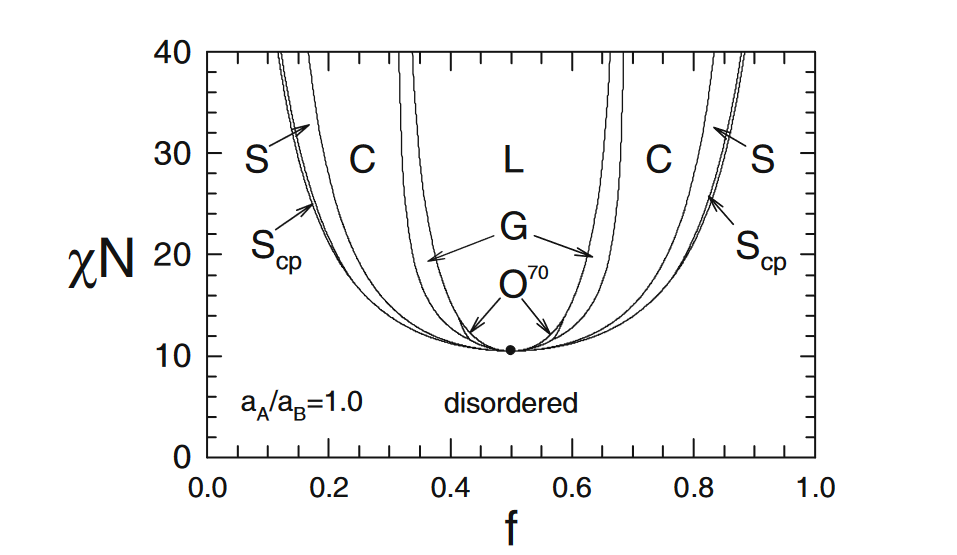

In [56]:
N = 10000

# fa_array = np.arange(0.3, 0.501, 0.01)#[0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.3, 0.35, 0.4, 0.45, 0.5]#np.arange(0.2, 0.51, .02)
chi_array = np.arange(8, 50, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N
M = 20
M_arr = [M]
N_m = N/M
b = 1


# fa_array = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
fa_array = np.arange(0.1, 0.91, 0.05)
poly_type = "diblock"
n_p = 1

In [17]:
%%time
TYPE = "MIL"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
    gyr_g4_mix2 = (1/3) * (2*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -1*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -1*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 

#     gyr_g4_mix2 = (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                    -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                    -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        

        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 45.5 s
Wall time: 2min 6s


Text(0.5, 1.0, 'mono AB diblock, ginzberg, gyr type MIL, my gyr g4mix2,  N = 10000')

<Figure size 640x480 with 0 Axes>

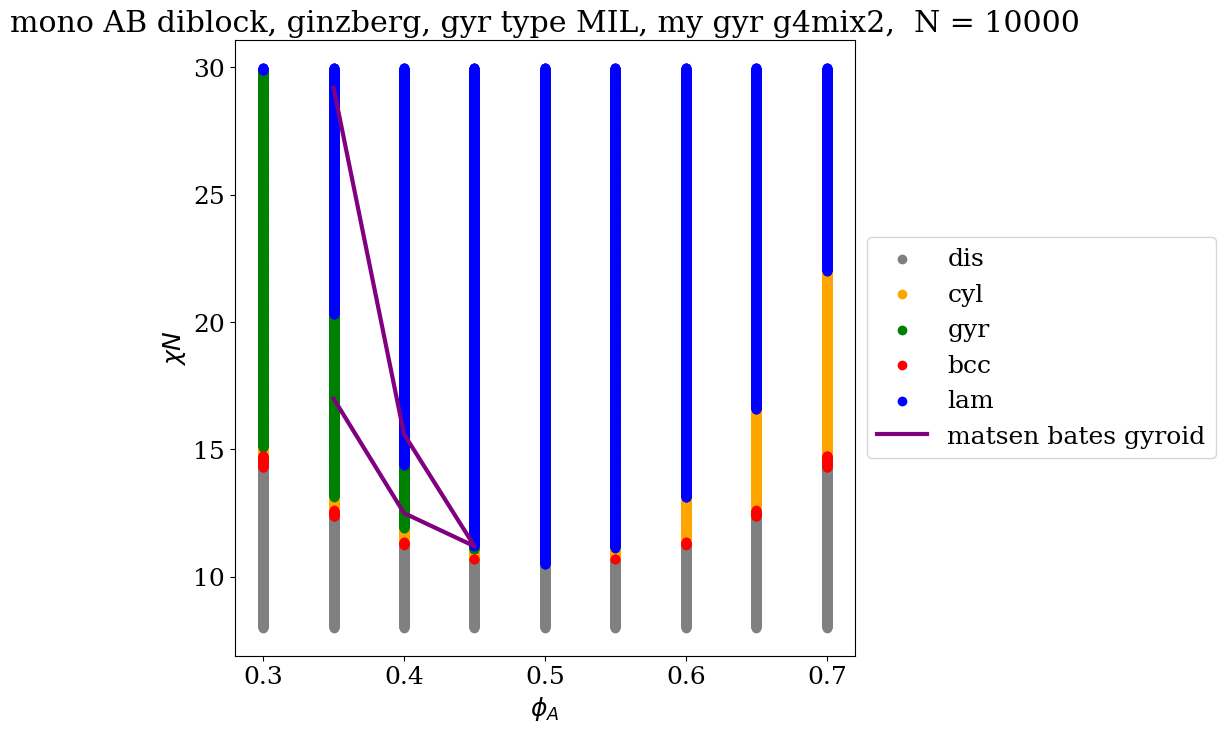

In [18]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
# ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

ax.plot([0.35, 0.4, 0.45, 0.4, 0.35], [17, 12.5, 11.2, 15.6, 29.2], linewidth=3, color = "purple", label = "matsen bates gyroid")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("mono AB diblock, ginzberg, gyr type " + TYPE + ", my gyr g4mix2,  N = " + str(N) )

In [53]:
    
q_star = 1
sq_6 = (1/np.sqrt(6)) * q_star
gyr_q1 = sq_6*np.array([-1, 2, 1])
gyr_q2 = sq_6*np.array([2, 1, -1])
gyr_q3 = sq_6*np.array([1, -1, 2])
gyr_q4 = sq_6*np.array([2, -1, -1])
gyr_q5 = sq_6*np.array([-1, 2, -1])
gyr_q6 = sq_6*np.array([-1, -1, 2])

gyr_q7 = sq_6*np.array([2, 1, 1])
gyr_q8 = sq_6*np.array([1, 2, 1])
gyr_q9 = sq_6*np.array([1, 1, 2])
gyr_q10 = sq_6*np.array([2, -1, 1])
gyr_q11 = sq_6*np.array([1, 2, -1])
gyr_q12 = sq_6*np.array([-1, 1, 2])

gyr_q1_2 = sq_6*np.array([2, 2, 0])
gyr_q2_2 = sq_6*np.array([2, 0, 2])
gyr_q3_2 = sq_6*np.array([0, 2, 2])
gyr_q4_2 = sq_6*np.array([-2, 2, 0])
gyr_q5_2 = sq_6*np.array([-2, 0, 2])
gyr_q6_2 = sq_6*np.array([0, -2, 2])  


gyrs = [gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9]
g1 = gyrs[0]
left = gyrs[1:]
for g in left:
    print(np.sum((g+g1)**2))
gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                   576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                   -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                   288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                   -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                   288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                   288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                   -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                   -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

0.3333333333333334
3.666666666666667
0.3333333333333334


In [57]:
%%time
TYPE = "AKS"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

    gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        
#original
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

# #switched
#         if gyr_g3<0:
#             gyr_g3*= -1
#         if gyr_g3_2<0:
#             gyr_g3_2*= -1
#         if gyr_g3_mix>0:
#             gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 7min 36s
Wall time: 13min 20s


Text(0.5, 1.0, 'mono AB diblock, ginzberg, gyr type AKS,  N = 10000')

<Figure size 640x480 with 0 Axes>

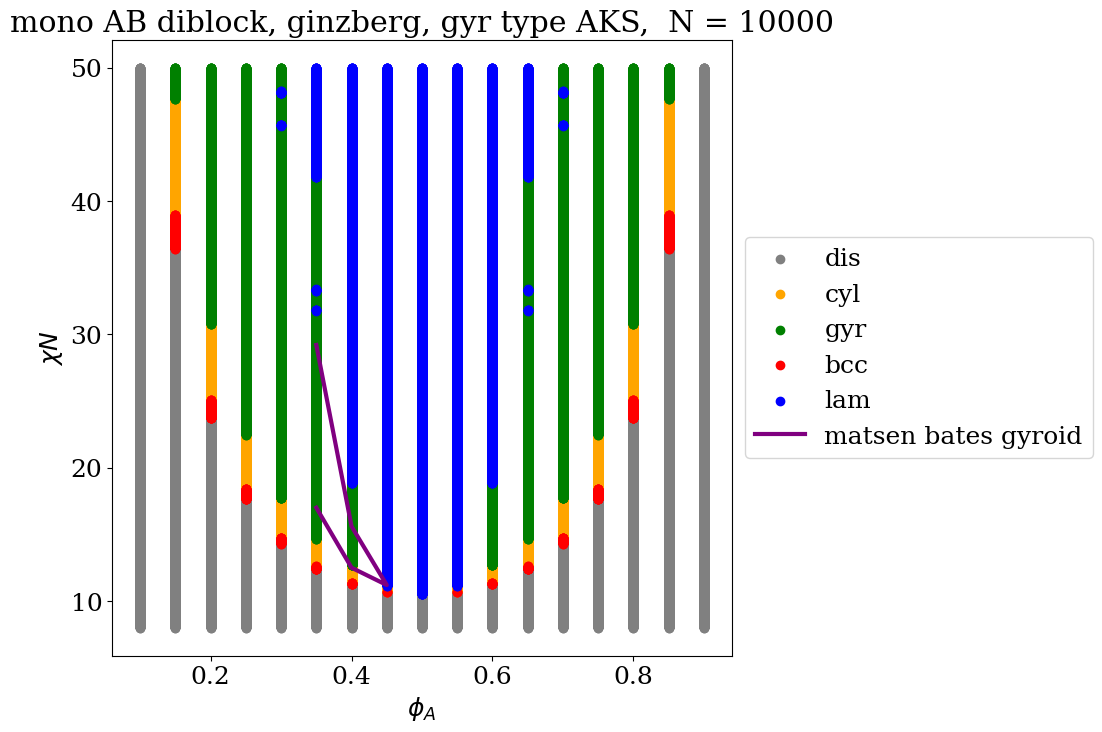

In [58]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
# ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

ax.plot([0.35, 0.4, 0.45, 0.4, 0.35], [17, 12.5, 11.2, 15.6, 29.2], linewidth=3, color = "purple", label = "matsen bates gyroid")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("mono AB diblock, ginzberg, gyr type " + TYPE + ",  N = " + str(N) )

In [19]:
%%time
TYPE = "ODC"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (1224*G4_00)
    gyr_g4_2 = (1/24) * (1/36) * (540*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])))
    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (864*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])))

    gyr_g4_mix2 = 0#(1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                            -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                            -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        
#original
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

# #switched
#         if gyr_g3<0:
#             gyr_g3*= -1
#         if gyr_g3_2<0:
#             gyr_g3_2*= -1
#         if gyr_g3_mix>0:
#             gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 1min 27s
Wall time: 2min 56s


Text(0.5, 1.0, 'mono AB diblock, ginzberg, gyr type ODC,  N = 10000')

<Figure size 640x480 with 0 Axes>

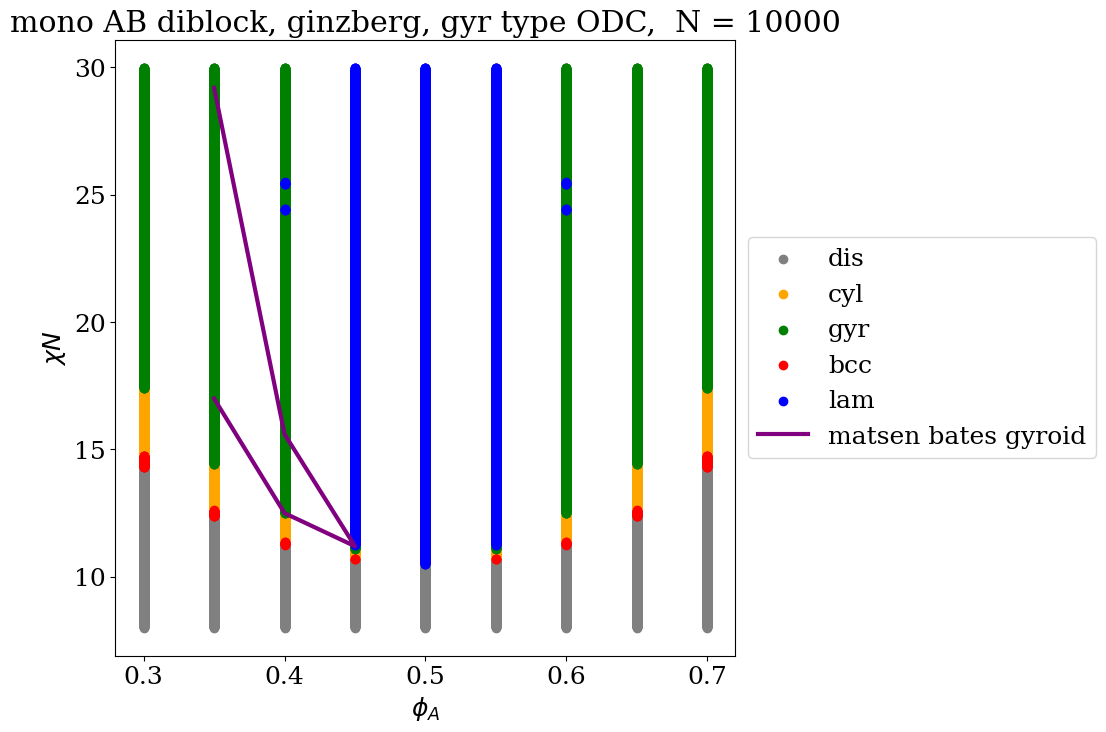

In [20]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
# ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

ax.plot([0.35, 0.4, 0.45, 0.4, 0.35], [17, 12.5, 11.2, 15.6, 29.2], linewidth=3, color = "purple", label = "matsen bates gyroid")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("mono AB diblock, ginzberg, gyr type " + TYPE + ",  N = " + str(N) )

In [59]:
%%time

TYPE = "2WV"

# AKS gyroid, ODC 2wvmd cylindrical!
dis_pnts = np.array([])
lam_pnts = np.array([])
cyl_pnts = np.array([])
gyr_pnts = np.array([])
bcc_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sq_cyl_q1_2 = q_star * np.array([2,0,0])
    sq_cyl_q2_2 = q_star * np.array([0,2,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    sim_cub_q1_2 = q_star * np.array([2,0,0])
    sim_cub_q2_2 = q_star * np.array([0,2,0])
    sim_cub_q3_2 = q_star * np.array([0,0,2])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    G3_211 = gamma3_E(mx, np.array([lam_q, lam_q, -lam_q_2])) 

    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = -(1/6) * 6 * G3_211
    
    cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(mx, cyl_qs)
    cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(mx, cyl_qs_2)
    cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(mx, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))

    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

    bcc_g3 = (4/(3*np.sqrt(6))) * G3#gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))

    sq_cyl_g3 = 0
    sq_cyl_g3_2 = 0
    sq_cyl_g3_mix = -(1/6) * (1/(2*np.sqrt(2))) * 12 * G3_211
    
    sim_cub_g3 = 0
    sim_cub_g3_2 = 0
    sim_cub_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 18 * G3_211
    
    fcc_g3 = 0

    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    G4_2_00 = gamma4_E(mx, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    G4_mix = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2]))
    
    lam_g4 = (1/24) * (6) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * G4_2_00
    lam_g4_mix = (1/24) * 24  * G4_mix
    
    cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
              72*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(mx, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4_E(mx, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

    cyl_g4_mix1 = (1/24) * (1/9) * (144*gamma4_E(mx, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                           72*gamma4_E(mx, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                           144*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
    cyl_g4_mix2 = -(1/24) * (1/9) * 144 * gamma4_E(mx, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

    gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    G4_2_90deg = gamma4_E(mx, np.array([sq_cyl_q1_2 , -sq_cyl_q1_2 , sq_cyl_q2_2 , -sq_cyl_q2_2 ]))
    G4_mix_90deg = gamma4_E(mx, np.array([sq_cyl_q1, -sq_cyl_q2_2, -sq_cyl_q1, sq_cyl_q2_2]))
    
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sq_cyl_g4_2 = (1/24) * (1/4) * (12*G4_2_00 + \
                                   24*G4_2_90deg)
    sq_cyl_g4_mix = (1/24) * (1/4) * (48 * G4_mix + 48 * G4_mix_90deg)
    
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    sim_cub_g4_2 = (1/24) * (1/9) * (18*G4_2_00+ \
                                   72*G4_2_90deg)
    sim_cub_g4_mix = (1/24) * (1/9) * (72*G4_mix + 144 * G4_mix_90deg)
    
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)       
        lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(mx, 2*q_star, CHI)         
        
        cyl_g2 = lam_g2
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(mx, np.sqrt(3)*q_star, CHI)    

        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        
        bcc_g2 = lam_g2
        
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sq_cyl_g2_2 = lam_g2_2
        
        sim_cub_g2 = lam_g2
        sim_cub_g2_2 = lam_g2_2
        
        fcc_g2 = lam_g2

        
        # when doing phase minimization, should always have the gamma 3 be negative.
        if cyl_g3>0:
            cyl_g3*= -1
        if cyl_g3_2<0:
            cyl_g3_2*= -1
        if cyl_g3_mix<0:
            cyl_g3_mix*= -1
            
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

            
        if lam_g3_mix>0:
            lam_g3_mix*= -1

        if sim_cub_g3_mix>0:
            sim_cub_g3_mix*= -1
            
        if sq_cyl_g3_mix>0:
            sq_cyl_g3_mix*= -1
        
        if bcc_g3>0:
            bcc_g3*= -1

        if fcc_g3>0:
            fcc_g3*= -1

#         if FA >= 0.5:
#             initial = [-1, -1] 
#             in_bcc = -1
#         else:
#             initial = [1,1]
#             in_bcc = 1
            
        initial = [0, 0] 
        in_bcc = 0


        amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              initial, disp=False)

        
        amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              initial, disp=False)
        
        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              initial, disp=False)
        
        amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              in_bcc, disp=False)
        
        amp_sq_c1, amp_sq_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sq_cyl_g2 + amps[0]**3 * sq_cyl_g3 + amps[0]**4 * sq_cyl_g4 + \
                                                        amps[1]**2 * sq_cyl_g2_2 + amps[1]**3 * sq_cyl_g3_2 + amps[1]**4 * sq_cyl_g4_2 + \
                                                        amps[0]**2 * amps[1] * sq_cyl_g3_mix + amps[0]**2 * amps[1]**2 * sq_cyl_g4_mix), \
                              initial, disp=False)
        
        amp_sim_c1, amp_sim_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sim_cub_g2 + amps[0]**3 * sim_cub_g3 + amps[0]**4 * sim_cub_g4 + \
                                                        amps[1]**2 * sim_cub_g2_2 + amps[1]**3 * sim_cub_g3_2 + amps[1]**4 * sim_cub_g4_2 + \
                                                        amps[0]**2 * amps[1] * sim_cub_g3_mix + amps[0]**2 * amps[1]**2 * sim_cub_g4_mix), \
                              initial, disp=False)
        
        amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                              1, disp=False)
        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
                amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
                amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
                amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
                amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
                amp_c1**3 * amp_c2 * cyl_g4_mix2
        
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2
        
        bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

        sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 + \
                amp_sq_c2**2 * sq_cyl_g2_2 + amp_sq_c2**3 * sq_cyl_g3_2 + amp_sq_c2**4 * sq_cyl_g4_2 +\
                amp_sq_c1**2 * amp_sq_c2 * sq_cyl_g3_mix + amp_sq_c1**2 * amp_sq_c2**2 * sq_cyl_g4_mix
        
        sim_cubF = amp_sim_c1**2 * sim_cub_g2 + amp_sim_c1**3 * sim_cub_g3 + amp_sim_c1**4 * sim_cub_g4 + \
                amp_sim_c2**2 * sim_cub_g2_2 + amp_sim_c2**3 * sim_cub_g3_2 + amp_sim_c2**4 * sim_cub_g4_2 +\
                amp_sim_c1**2 * amp_sim_c2 * sim_cub_g3_mix + amp_sim_c1**2 * amp_sim_c2**2 * sim_cub_g4_mix

        fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4

#         num_iters = 100
#         lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
#                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
#                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
#                               initial, disp=False, niter = num_iters)


#         cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
#                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
#                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
#                               initial, disp=False, niter = num_iters)
        
#         gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False, niter = num_iters)
        
#         bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False, niter = num_iters)
        
#         lamF = lam.fun
        
#         cylF = cyl.fun
        
#         gyrF = gyr.fun
        
#         bccF = bcc.fun

#         print("lamF", lamF)
#         print("cylF", cylF)
#         print("gyrF", gyrF)
#         print("bccF", bccF)
        point = np.array([FA, CHI*N])

        minF = min([lamF, cylF, gyrF, bccF, sq_cylF, sim_cubF, fccF])

        if minF >= 0:
#             phase_name = "dis"
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
#             phase_name = "lam" 
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
#             phase_name = "cyl"
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == sq_cylF:
#             phase_name = "sqcyl"
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
#             phase_name = "simcub"
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
#         elif minF == fccF:
#             phase_name = "fcc"
        else:
            raise Exception("error in min F phase assignment")

#         print("cyl_g2", cyl_g2)
#         print("cyl_g2_2", cyl_g2_2)
    print("one FA done!!")

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 20min 40s
Wall time: 52min 44s


Text(0.5, 1.0, 'mono AB diblock, gyr type 2WV,  N = 10000')

<Figure size 640x480 with 0 Axes>

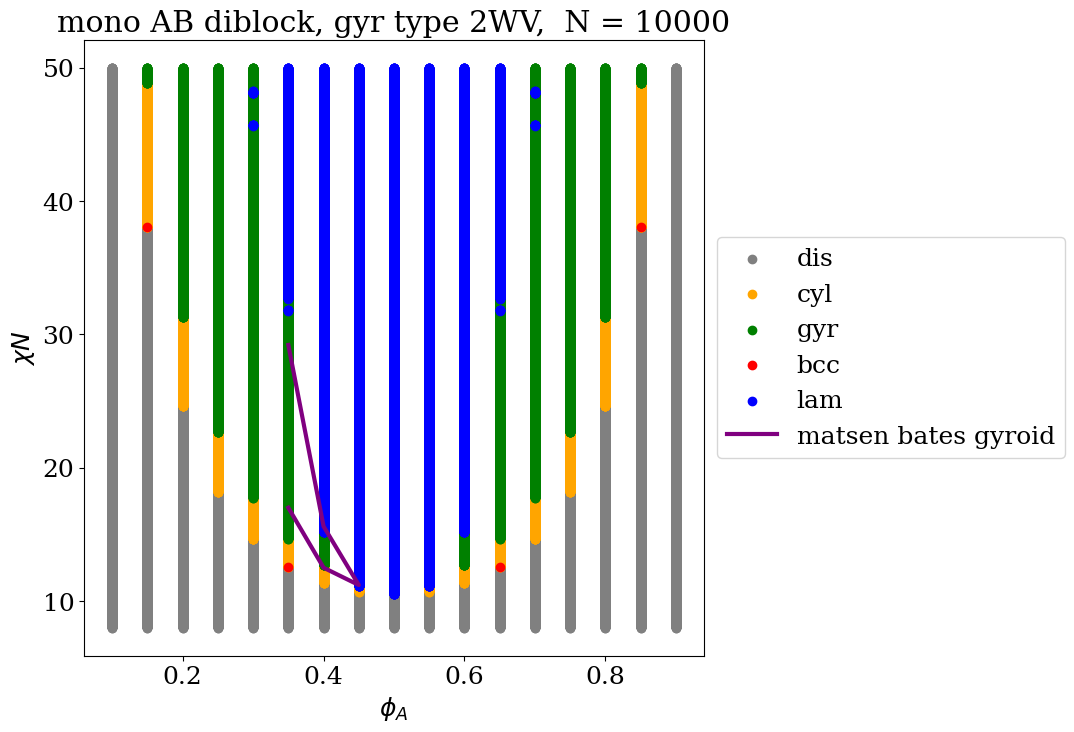

In [60]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
# ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

ax.plot([0.35, 0.4, 0.45, 0.4, 0.35], [17, 12.5, 11.2, 15.6, 29.2], linewidth=3, color = "purple", label = "matsen bates gyroid")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("mono AB diblock, gyr type " + TYPE + ",  N = " + str(N) )

# mono ABA triblock

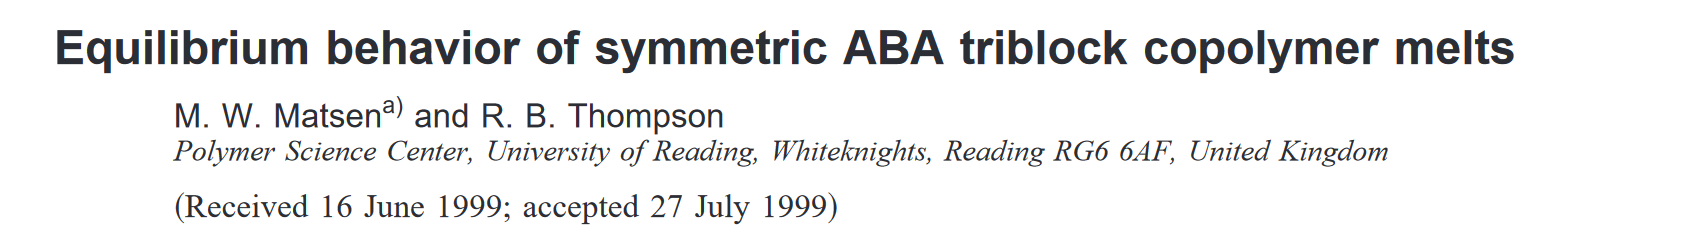

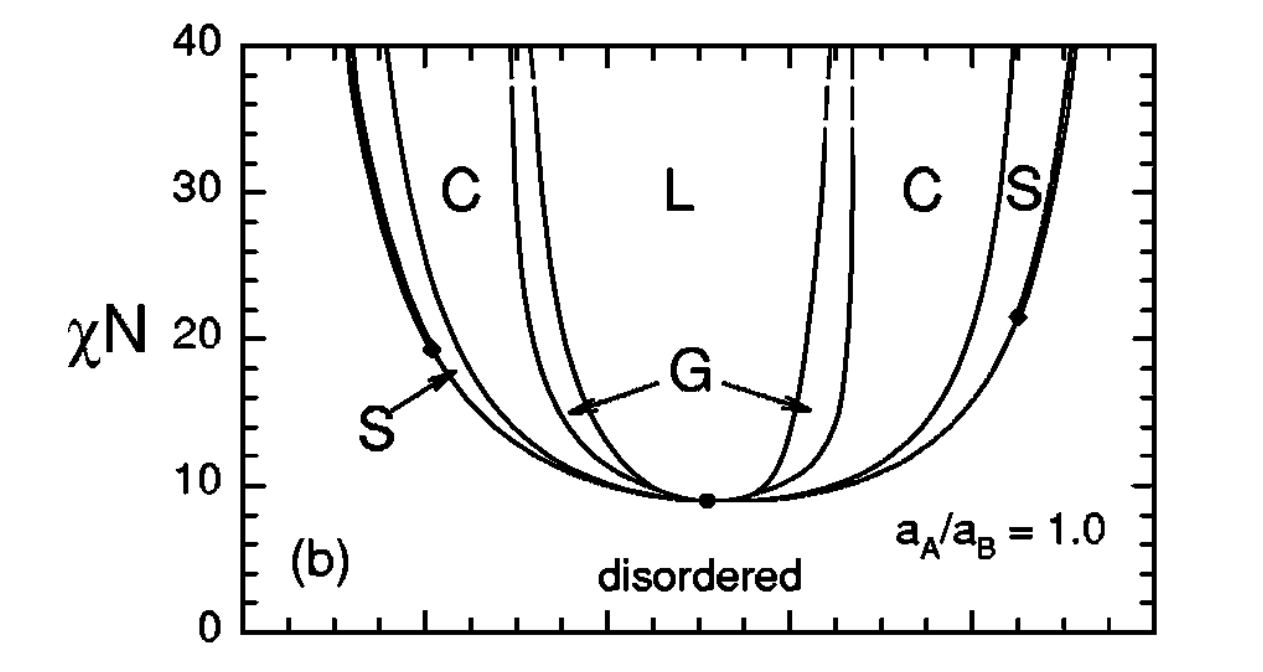

In [36]:
N = 10000

chi_array = np.arange(0, 50, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N

b = 1
n_p = 1

# ABA matsen
dens = [1.]
triblock_polyfa = [[0.3, [0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20)],[0.4, [0,0,1,1,1,1,1,1,0,0]],\
          [0.5, [0,1,1,0]],[0.6, [0,0,0,1,1,1,1,0,0,0]],[0.7, [0]*int(0.35*20) + [1] * int(0.3*20) + [0]*int(0.35*20)]]



In [9]:
%%time
TYPE = "MIL"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA,poly_mat in triblock_polyfa:
    M = int(len(poly_mat))
    N_m = int(N/M)
    M_arr = [M]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
#     gyr_g4_mix2 = (1/3) * (2*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                            -1*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                            -1*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 
    
    gyr_g4_mix2 = (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                       -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                       -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        

        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 19 s
Wall time: 1min


In [ ]:
%%time
TYPE = "AKS"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA,poly_mat in triblock_polyfa:
    M = int(len(poly_mat))
    N_m = int(N/M)
    M_arr = [M]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

    gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        

        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

In [25]:
%%time
TYPE = "ODC"

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA,poly_mat in triblock_polyfa:
    M = int(len(poly_mat))
    N_m = int(N/M)
    M_arr = [M]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (1224*G4_00)
    gyr_g4_2 = (1/24) * (1/36) * (540*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])))
    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (864*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])))

    gyr_g4_mix2 = 0#(1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                            -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                            -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
   
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        

        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [0,0], disp=False)

        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

        amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
        amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
        amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
        amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#         amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#         amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
        amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
        amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
        amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
        amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

        lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
        cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
        bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#         gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
        sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
        sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
        fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

        lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
        cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
        bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#         gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
        sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
        sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
        fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

        lamF = min(lamF_1, lamF_2)
        cylF = min(cylF_1, cylF_2)
        bccF = min(bccF_1, bccF_2)
#         gyrF = min(gyrF_1, gyrF_2)
        sq_cylF = min(sq_cylF_1, sq_cylF_2)
        sim_cubF = min(sim_cubF_1, sim_cubF_2)
        fccF = min(fccF_1, fccF_2)
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF >= 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 57.2 s
Wall time: 2min 10s


In [37]:
%%time

TYPE = "2WV"

# AKS gyroid, ODC 2wvmd cylindrical!
dis_pnts = np.array([])
lam_pnts = np.array([])
cyl_pnts = np.array([])
gyr_pnts = np.array([])
bcc_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])

for FA,poly_mat in triblock_polyfa:
    M = int(len(poly_mat))
    N_m = int(N/M)
    M_arr = [M]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    q_star = mx.q_star
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sq_cyl_q1_2 = q_star * np.array([2,0,0])
    sq_cyl_q2_2 = q_star * np.array([0,2,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    sim_cub_q1_2 = q_star * np.array([2,0,0])
    sim_cub_q2_2 = q_star * np.array([0,2,0])
    sim_cub_q3_2 = q_star * np.array([0,0,2])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
    G3_211 = gamma3_E(mx, np.array([lam_q, lam_q, -lam_q_2])) 

    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = -(1/6) * 6 * G3_211
    
    cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(mx, cyl_qs)
    cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(mx, cyl_qs_2)
    cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(mx, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))

    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

    bcc_g3 = (4/(3*np.sqrt(6))) * G3#gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))

    sq_cyl_g3 = 0
    sq_cyl_g3_2 = 0
    sq_cyl_g3_mix = -(1/6) * (1/(2*np.sqrt(2))) * 12 * G3_211
    
    sim_cub_g3 = 0
    sim_cub_g3_2 = 0
    sim_cub_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 18 * G3_211
    
    fcc_g3 = 0

    G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    G4_2_00 = gamma4_E(mx, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    G4_mix = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2]))
    
    lam_g4 = (1/24) * (6) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * G4_2_00
    lam_g4_mix = (1/24) * 24  * G4_mix
    
    cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
              72*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(mx, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4_E(mx, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

    cyl_g4_mix1 = (1/24) * (1/9) * (144*gamma4_E(mx, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                           72*gamma4_E(mx, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                           144*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
    cyl_g4_mix2 = -(1/24) * (1/9) * 144 * gamma4_E(mx, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

    gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    G4_2_90deg = gamma4_E(mx, np.array([sq_cyl_q1_2 , -sq_cyl_q1_2 , sq_cyl_q2_2 , -sq_cyl_q2_2 ]))
    G4_mix_90deg = gamma4_E(mx, np.array([sq_cyl_q1, -sq_cyl_q2_2, -sq_cyl_q1, sq_cyl_q2_2]))
    
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sq_cyl_g4_2 = (1/24) * (1/4) * (12*G4_2_00 + \
                                   24*G4_2_90deg)
    sq_cyl_g4_mix = (1/24) * (1/4) * (48 * G4_mix + 48 * G4_mix_90deg)
    
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    sim_cub_g4_2 = (1/24) * (1/9) * (18*G4_2_00+ \
                                   72*G4_2_90deg)
    sim_cub_g4_mix = (1/24) * (1/9) * (72*G4_mix + 144 * G4_mix_90deg)
    
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)       
        lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(mx, 2*q_star, CHI)         
        
        cyl_g2 = lam_g2
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(mx, np.sqrt(3)*q_star, CHI)    

        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
        
        bcc_g2 = lam_g2
        
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
        sq_cyl_g2_2 = lam_g2_2
        
        sim_cub_g2 = lam_g2
        sim_cub_g2_2 = lam_g2_2
        
        fcc_g2 = lam_g2

        
        # when doing phase minimization, should always have the gamma 3 be negative.
        if cyl_g3>0:
            cyl_g3*= -1
        if cyl_g3_2<0:
            cyl_g3_2*= -1
        if cyl_g3_mix<0:
            cyl_g3_mix*= -1
            
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1

            
        if lam_g3_mix>0:
            lam_g3_mix*= -1

        if sim_cub_g3_mix>0:
            sim_cub_g3_mix*= -1
            
        if sq_cyl_g3_mix>0:
            sq_cyl_g3_mix*= -1
        
        if bcc_g3>0:
            bcc_g3*= -1

        if fcc_g3>0:
            fcc_g3*= -1

#         if FA >= 0.5:
#             initial = [-1, -1] 
#             in_bcc = -1
#         else:
#             initial = [1,1]
#             in_bcc = 1
            
        initial = [0, 0] 
        in_bcc = 0


        amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              initial, disp=False)

        
        amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              initial, disp=False)
        
        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              initial, disp=False)
        
        amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              in_bcc, disp=False)
        
        amp_sq_c1, amp_sq_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sq_cyl_g2 + amps[0]**3 * sq_cyl_g3 + amps[0]**4 * sq_cyl_g4 + \
                                                        amps[1]**2 * sq_cyl_g2_2 + amps[1]**3 * sq_cyl_g3_2 + amps[1]**4 * sq_cyl_g4_2 + \
                                                        amps[0]**2 * amps[1] * sq_cyl_g3_mix + amps[0]**2 * amps[1]**2 * sq_cyl_g4_mix), \
                              initial, disp=False)
        
        amp_sim_c1, amp_sim_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sim_cub_g2 + amps[0]**3 * sim_cub_g3 + amps[0]**4 * sim_cub_g4 + \
                                                        amps[1]**2 * sim_cub_g2_2 + amps[1]**3 * sim_cub_g3_2 + amps[1]**4 * sim_cub_g4_2 + \
                                                        amps[0]**2 * amps[1] * sim_cub_g3_mix + amps[0]**2 * amps[1]**2 * sim_cub_g4_mix), \
                              initial, disp=False)
        
        amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                              1, disp=False)
        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
                amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
                amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
                amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
                amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
                amp_c1**3 * amp_c2 * cyl_g4_mix2
        
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2
        
        bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

        sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 + \
                amp_sq_c2**2 * sq_cyl_g2_2 + amp_sq_c2**3 * sq_cyl_g3_2 + amp_sq_c2**4 * sq_cyl_g4_2 +\
                amp_sq_c1**2 * amp_sq_c2 * sq_cyl_g3_mix + amp_sq_c1**2 * amp_sq_c2**2 * sq_cyl_g4_mix
        
        sim_cubF = amp_sim_c1**2 * sim_cub_g2 + amp_sim_c1**3 * sim_cub_g3 + amp_sim_c1**4 * sim_cub_g4 + \
                amp_sim_c2**2 * sim_cub_g2_2 + amp_sim_c2**3 * sim_cub_g3_2 + amp_sim_c2**4 * sim_cub_g4_2 +\
                amp_sim_c1**2 * amp_sim_c2 * sim_cub_g3_mix + amp_sim_c1**2 * amp_sim_c2**2 * sim_cub_g4_mix

        fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4

#         num_iters = 100
#         lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
#                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
#                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
#                               initial, disp=False, niter = num_iters)


#         cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
#                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
#                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
#                               initial, disp=False, niter = num_iters)
        
#         gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False, niter = num_iters)
        
#         bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False, niter = num_iters)
        
#         lamF = lam.fun
        
#         cylF = cyl.fun
        
#         gyrF = gyr.fun
        
#         bccF = bcc.fun

#         print("lamF", lamF)
#         print("cylF", cylF)
#         print("gyrF", gyrF)
#         print("bccF", bccF)
        point = np.array([FA, CHI*N])

        minF = min([lamF, cylF, gyrF, bccF, sq_cylF, sim_cubF, fccF])

        if minF >= 0:
#             phase_name = "dis"
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
#             phase_name = "lam" 
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
#             phase_name = "cyl"
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == sq_cylF:
#             phase_name = "sqcyl"
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
#             phase_name = "simcub"
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
#         elif minF == fccF:
#             phase_name = "fcc"
        else:
            raise Exception("error in min F phase assignment")

#         print("cyl_g2", cyl_g2)
#         print("cyl_g2_2", cyl_g2_2)
    print("one FA done!!")

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
CPU times: total: 7min 32s
Wall time: 10min 51s


Text(0.5, 1.0, 'mono ABA diblock, ginzberg, gyr type 2WV my gyr g4mix2,  N = 10000')

<Figure size 640x480 with 0 Axes>

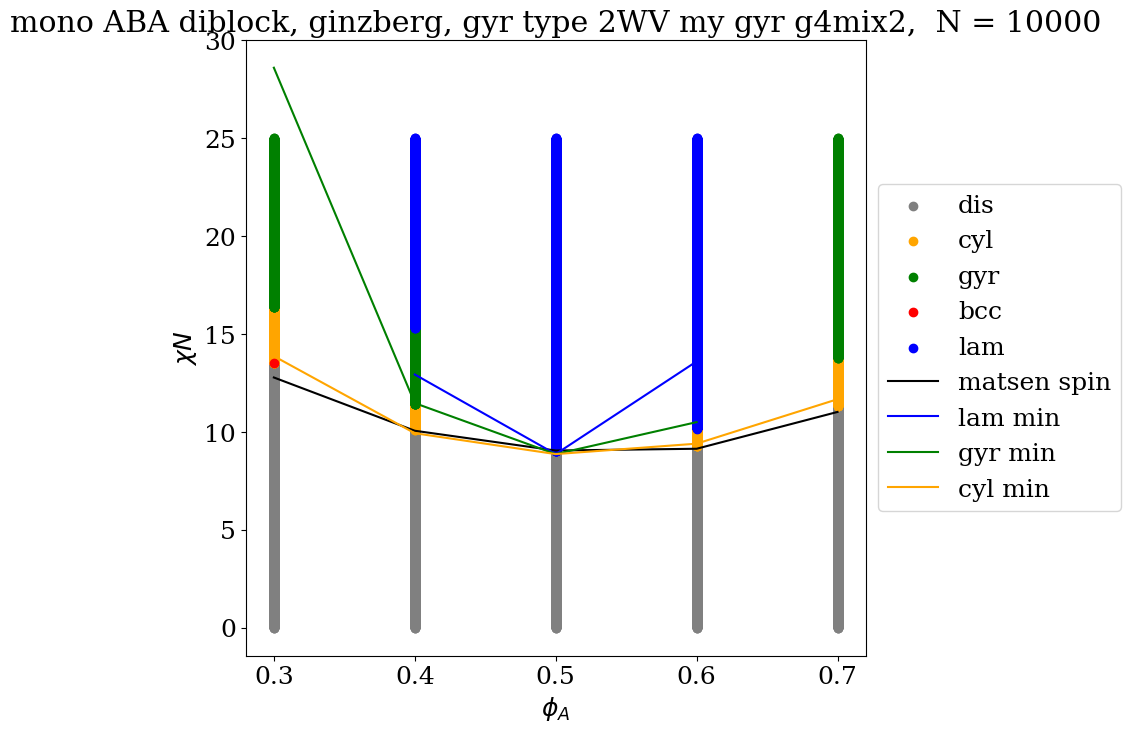

In [38]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")
# ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

plt.plot([0.3, 0.4, 0.5, 0.6, 0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen spin")
plt.plot([0.4, 0.5, 0.6], [12.933, 8.867, 13.6], color = "blue", label = "lam min")
plt.plot([0.3, 0.4, 0.5, 0.6], [28.6, 11.47, 8.867, 10.5], color = "green", label = "gyr min")
plt.plot([0.3, 0.4, 0.5, 0.6, 0.7], [13.87, 9.933, 8.867, 9.40, 11.67], color = "orange", label = "cyl min")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("mono ABA diblock, ginzberg, gyr type " + TYPE + " my gyr g4mix2,  N = " + str(N) )

#  AB diblock binary mix

In [61]:
%%time
TYPE = "MIL"
# ginzberg criterion, milner gyroid
N = 10000
M = 20
M_arr = [M, M]
N_m = N / M
b=1
chi_array = np.arange(10, 25.1, 0.1)/N

fa_1 = 0.25
poly_1 = [0]*int(M*fa_1) + [1]*int(M*(1-fa_1))

fa_2 = 0.65
poly_2 =  [0]*int(M*fa_2) + [1]*int(M*(1-fa_2))

poly_mat = [poly_1, poly_2]
dens_1_arr = np.arange(0.1, 0.6, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

for ds1 in dens_1_arr:
    dens = [ds1, 1-ds1]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    phi_bar = fa_1 * ds1 + fa_2 * (1-ds1)

    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([ds, CHI*N_l])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])
        
        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
        gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
        gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                           72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                           144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
        gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                               576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

#         gyr_g4_mix2 = (1/3) * (2*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                                -1*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                                -1*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 

        gyr_g4_mix2 = (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
        
        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
        
        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  [0,0], disp=False)

            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#             amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#             amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#             gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#             gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
#             gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)
            
            point = np.array([phi_bar, CHI*mx.N])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("one ds done")

KeyboardInterrupt: 

In [31]:
int(M*(1-fa_2))

3

In [33]:
np.round(1-fa_2, 1)

0.2

In [38]:
print(len(poly_2))
poly_2

20


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [41]:
1-0.8

0.19999999999999996

In [54]:
np.arange(0.0, 1.01, 0.025)

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

In [167]:
%%time
TYPE = "AKS"
# ginzberg criterion, Aksimentiev gyroid (Phase behavior of gradient copolymers Aleksij Aksimentiev; Robert Hołyst)
N = 10000
M = 20
M_arr = [M, M]
N_m = N / M
b=1
chi_array = np.arange(10, 25.1, 0.1)/N
# chi_array = np.arange(10, 25.1, 0.25)/N  #dopant test
# chi_array = [14/N]

# #sakurai
# fa_1 = 0.25
# poly_1 = [0]*int(M*fa_1) + [1]*int(M*(1-fa_1))

# fa_2 = 0.65
# poly_2 =  [0]*int(M*fa_2) + [1]*int(M*(1-fa_2))

# differnt
fa_1 = 0.2
poly_1 = [0]*int(M*fa_1) + [1]*int(M*np.round(1-fa_1, 2))

fa_2 = 0.8
poly_2 =  [0]*int(M*fa_2) + [1]*int(M*np.round(1-fa_2, 2))


# # differnt
# fa_1 = 0.4
# poly_1 = [0]*int(M*fa_1) + [1]*int(M*np.round(1-fa_1, 2))

# fa_2 = 0.6
# poly_2 =  [0]*int(M*fa_2) + [1]*int(M*np.round(1-fa_2, 2))


poly_mat = [poly_1, poly_2]
# dens_1_arr = np.arange(0.1, 0.6, 0.05)
# dens_1_arr = np.arange(0.0, 0.6, 0.025) #dopant test
dens_1_arr = np.arange(0.0, 1.01, 0.025) #dopant test


lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

rel_gyr_stab_arr_gl = np.array([])
rel_gyr_stab_arr_gc = np.array([])
rel_gyr_stab_arr_gb = np.array([])
rel_gyr_stab_arr_glcb = np.array([])

for ds1 in dens_1_arr:
    dens = [ds1, 1-ds1]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    phi_bar = fa_1 * ds1 + fa_2 * (1-ds1)
#     print("PHIBAR: ", phi_bar)
    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([phi_bar,  CHI*mx.N])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])
        
        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
        gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
        gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                           72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                           144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
        gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                               576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

        gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                               -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))


        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
        
        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  [0,0], disp=False)
#             print(amp_g1, amp_g2)
            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#             amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#             amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#             gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#             gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
#             gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)
            
            point = np.array([phi_bar, CHI*mx.N])
            
            # gyr relative stability analysis
            rel_gyr_stab_gl = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-lamF))#+ np.exp(-cylF)  + np.exp(-bccF))
            rel_gyr_stab_gc = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-cylF))#+ np.exp()  + np.exp(-bccF))
            rel_gyr_stab_gb = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-bccF))#+ np.exp(-cylF)  + np.exp())
            rel_gyr_stab_glcb = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-lamF)+ np.exp(-cylF)  + np.exp(-bccF))
            rel_point_gl = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gl])
            rel_point_gc = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gc])
            rel_point_gb = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gb])
            rel_point_glcb = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_glcb])
            rel_gyr_stab_arr_gl = np.append(rel_gyr_stab_arr_gl, rel_point_gl)
            rel_gyr_stab_arr_gc = np.append(rel_gyr_stab_arr_gc, rel_point_gc)
            rel_gyr_stab_arr_gb = np.append(rel_gyr_stab_arr_gb, rel_point_gb)
            rel_gyr_stab_arr_glcb = np.append(rel_gyr_stab_arr_glcb, rel_point_glcb)
            
            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
#                 print("-----------------------------------------")
#                 print("CHI N: ", CHI*mx.N)

#                 print("GYR: ", gyrF)
#                 print("LAM: ", lamF)
#                 print("-----------------------------------------")
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("one ds done")

one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
CPU times: total: 6min 23s
Wall time: 7min 32s


Text(0.5, 1.0, 'binary mix diblock gvlcb non SAKURAI fa1 = 0.2, fa2 = 0.8, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

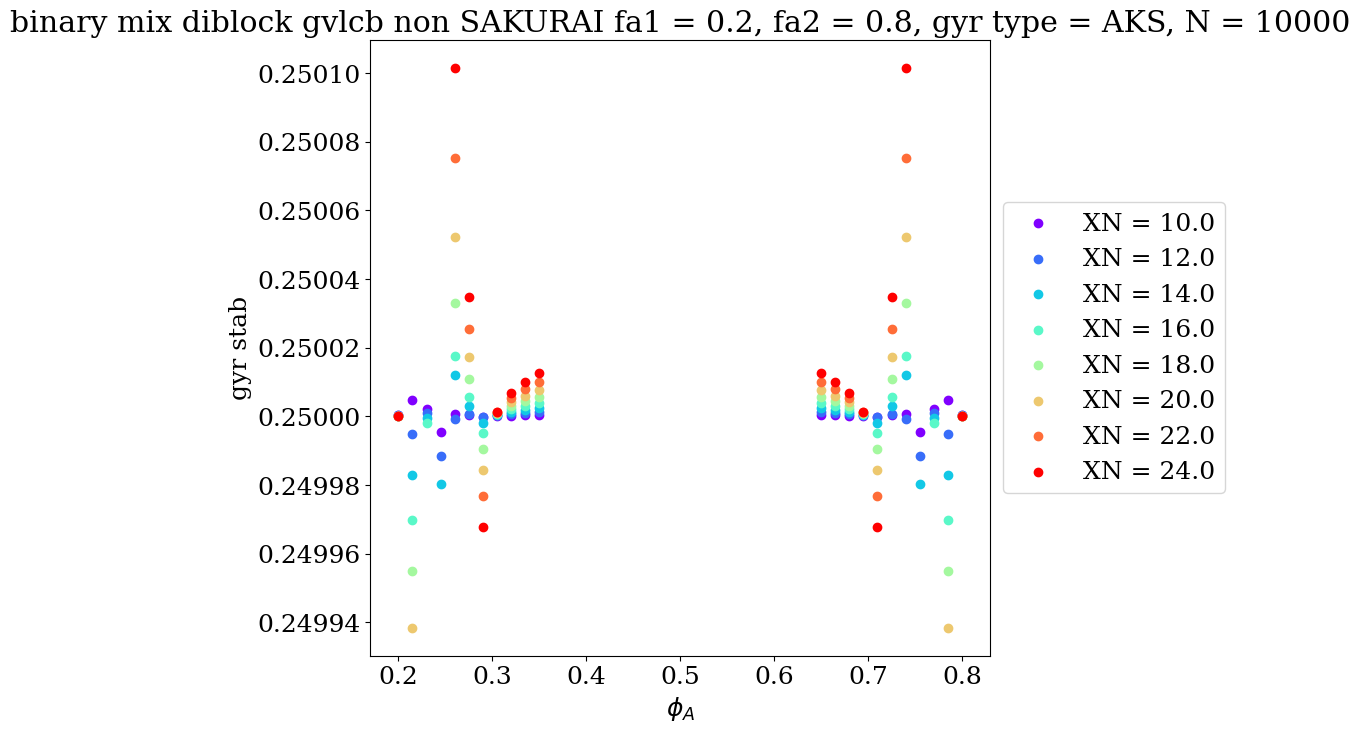

In [171]:
x = rel_gyr_stab_arr_glcb[::3]
y = rel_gyr_stab_arr_glcb[1::3]
z = rel_gyr_stab_arr_glcb[2::3]

# chit = np.unique(y)[::10][-1]
# x = x[np.where(y==chit)]
# y = y[np.where(y==chit)]
# z = z[np.where(y==chit)]

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)
# ax.scatter(x, z, label = str(chit))
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
color = iter(cm.rainbow(np.linspace(0, 1, len(np.unique(y)[::20]))))

for chit in np.unique(y)[::20]:
    c = next(color)
    x_chit = x[np.where(y==chit)]
    y_chit = y[np.where(y==chit)]
    z_chit = z[np.where(y==chit)]   
    ax.scatter(x_chit, z_chit, label = "XN = " + str(np.round(np.real(chit), 2)), c=c)

# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("binary mix diblock gvlcb non SAKURAI fa1 = " + str(fa_1) + ", fa2 = " + str(fa_2) + ", gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix diblock gvlvcvb SAKURAI fa1 = 0.25, fa2 = 0.65, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

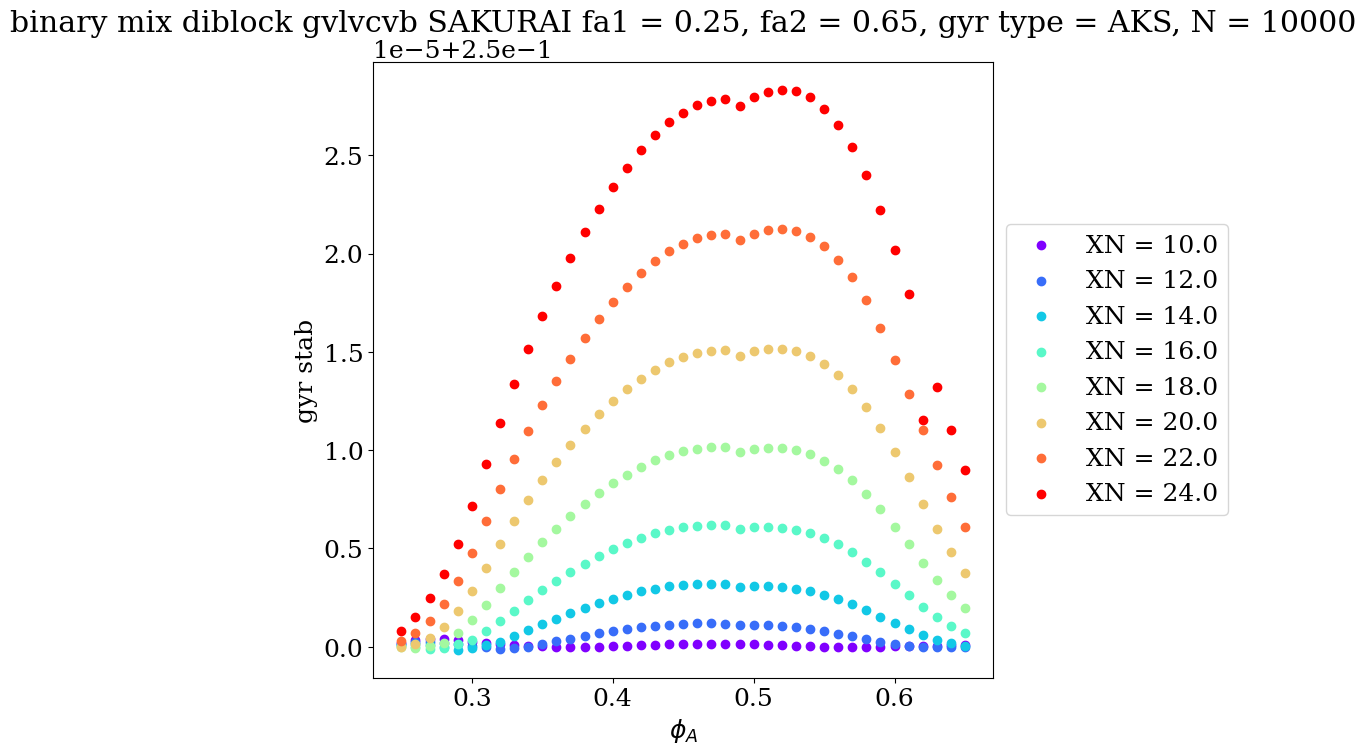

In [146]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

# chit = np.unique(y)[::10][-1]
# x = x[np.where(y==chit)]
# y = y[np.where(y==chit)]
# z = z[np.where(y==chit)]

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)
# ax.scatter(x, z, label = str(chit))
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
color = iter(cm.rainbow(np.linspace(0, 1, len(np.unique(y)[::20]))))

for chit in np.unique(y)[::20]:
    c = next(color)
    x_chit = x[np.where(y==chit)]
    y_chit = y[np.where(y==chit)]
    z_chit = z[np.where(y==chit)]   
    ax.scatter(x_chit, z_chit, label = "XN = " + str(np.round(np.real(chit), 2)), c=c)

# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("binary mix diblock gvlvcvb SAKURAI fa1 = " + str(fa_1) + ", fa2 = " + str(fa_2) + ", gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix diblock gvlvcvb SAKURAI fa1 = 0.25, fa2 = 0.65, XN = 14, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

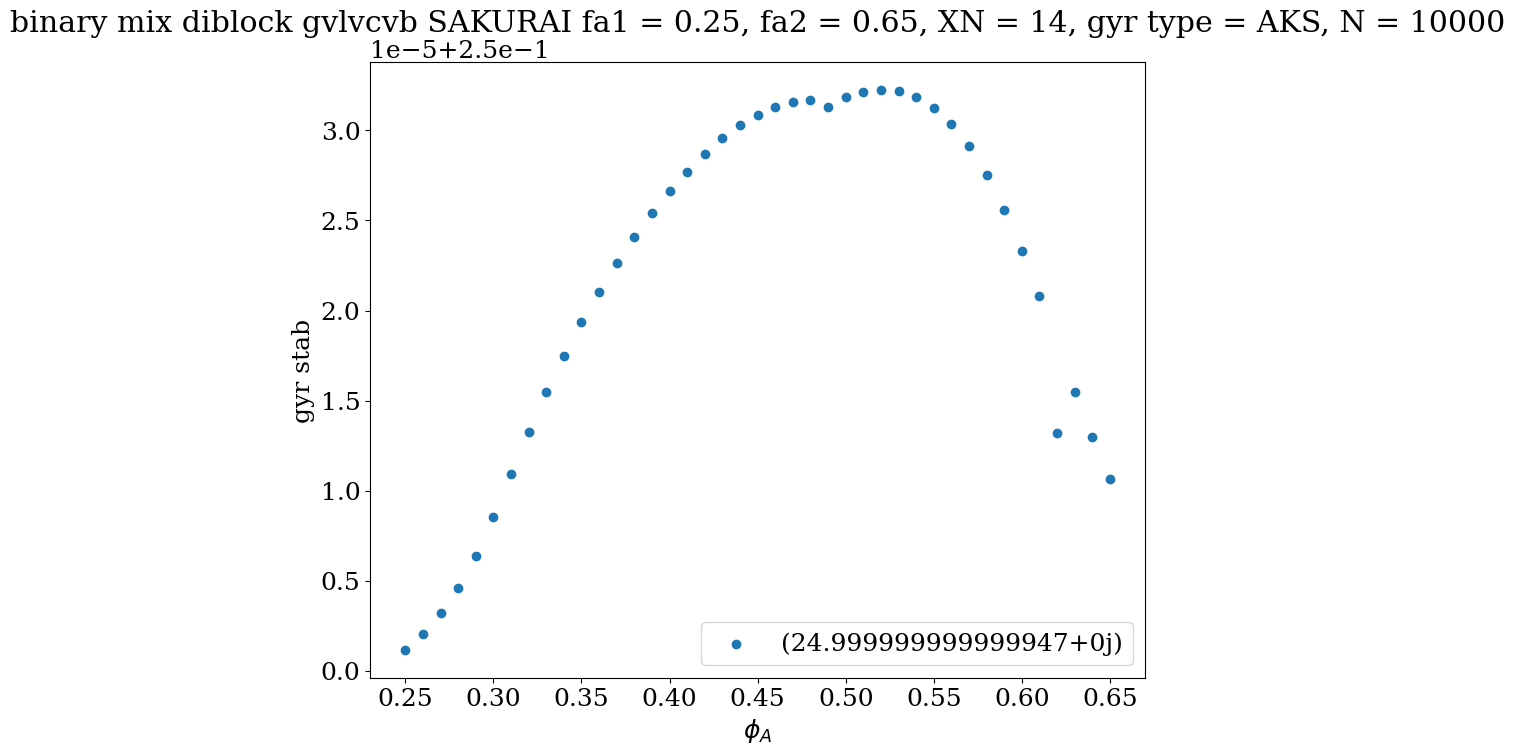

In [129]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

chit = np.unique(y)[::10][-1]
x = x[np.where(y==chit)]
y_ts = y[np.where(y==chit)]
z = z[np.where(y==chit)]

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)
ax.scatter(x, z, label = str(chit))
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')

# for chit in np.unique(y)[::10]:
#     x_chit = x[np.where(y==chit)]
#     y_chit = y[np.where(y==chit)]
#     z_chit = z[np.where(y==chit)]   
#     ax.scatter(x_chit, z_chit, label = str(chit))

# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
ax.legend()
ax.set_title("binary mix diblock gvlvcvb SAKURAI fa1 = " + str(fa_1) + ", fa2 = " + str(fa_2) + ", XN = 14, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix diblock lam vs gyr NON SAKURAI fa1 = 0.4, fa2 = 0.6, XN = 14, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

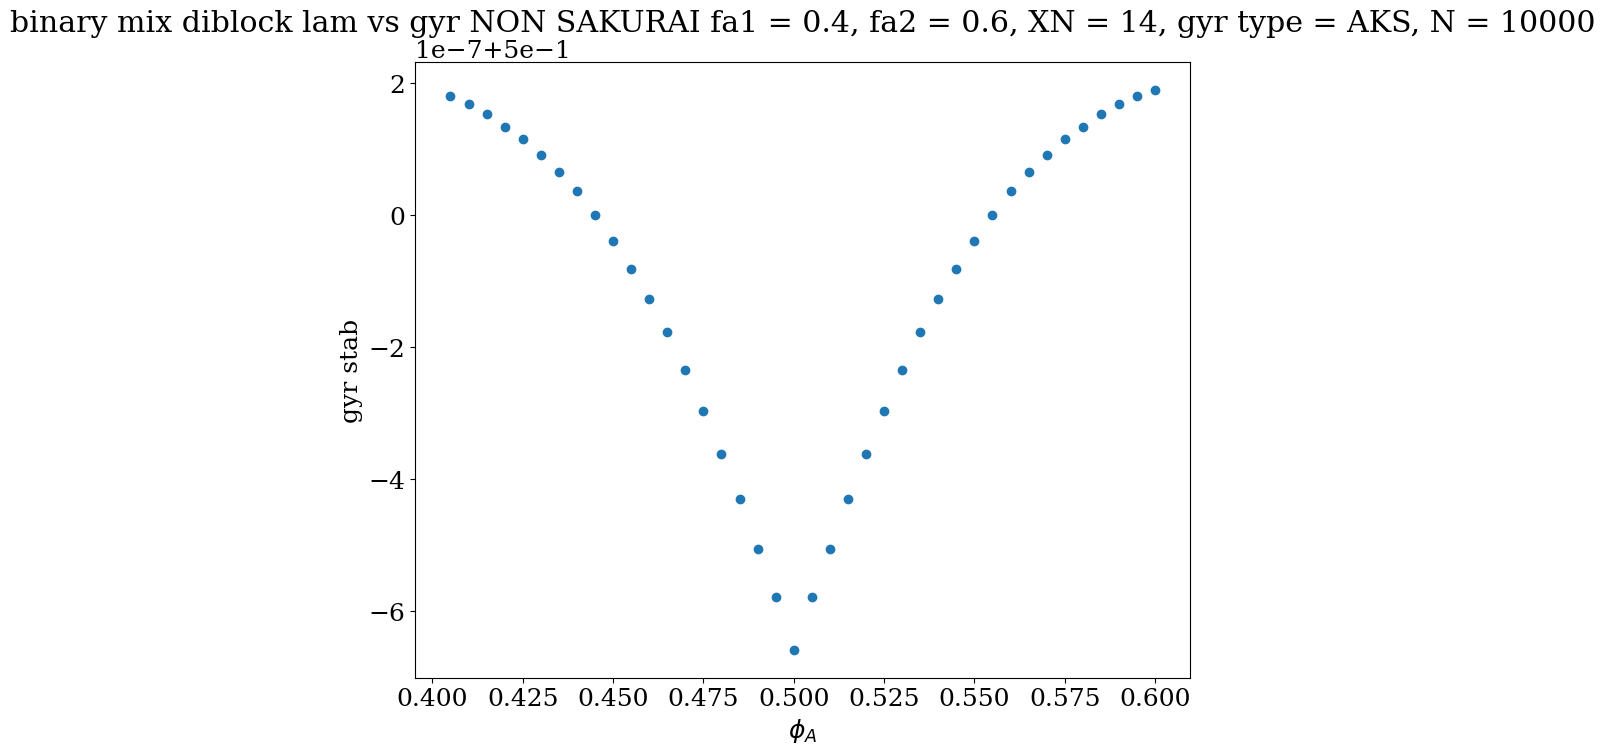

In [23]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

# x = x[np.where(y==13.999999999999988+0j)]
# y = y[np.where(y==13.999999999999988+0j)]
# z = z[np.where(y==13.999999999999988+0j)]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.scatter(x, z)
# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
ax.set_title("binary mix diblock lam vs gyr NON SAKURAI fa1 = " + str(fa_1) + ", fa2 = " + str(fa_2) + ", XN = 14, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix lam vs gyr diblock sakurai, XN = 14, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

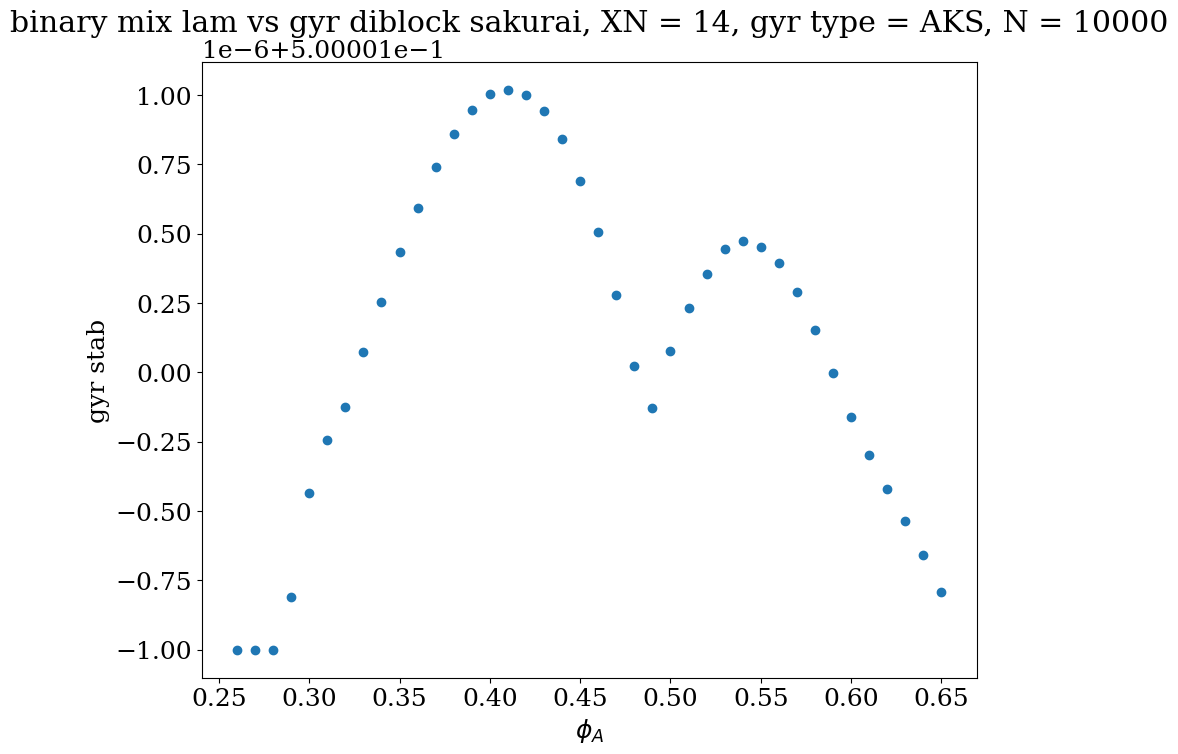

In [8]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

# x = x[np.where(y==13.999999999999988+0j)]
# y = y[np.where(y==13.999999999999988+0j)]
# z = z[np.where(y==13.999999999999988+0j)]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.scatter(x, z)
# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
ax.set_title("binary mix lam vs gyr diblock sakurai, XN = 14, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 0.92, 'binary mix lam vs gyr diblock sakurai, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

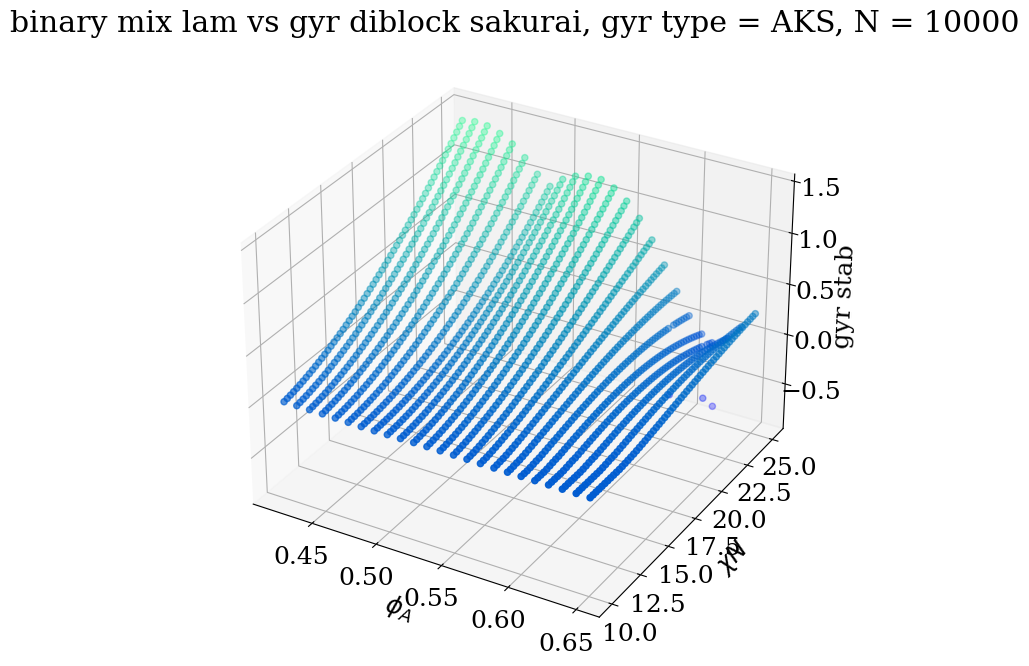

In [110]:

x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
# ax = plt.subplot(111)

# fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_zlabel('gyr stab');
# ax.set_ylim(10, 25)
ax.set_title("binary mix lam vs gyr diblock sakurai, gyr type = " + TYPE + ", N = " + str(N))

<Figure size 640x480 with 0 Axes>

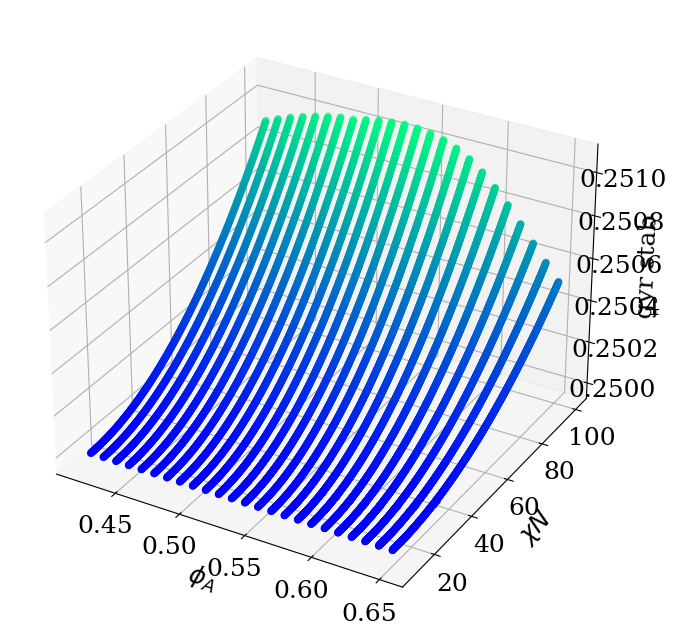

In [96]:

x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
# ax = plt.subplot(111)

# fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_zlabel('gyr stab');



In [80]:
np.argmax(rel_gyr_stab_arr[2::3])

11712

In [87]:
np.std(rel_gyr_stab_arr[2::3])

0.0002834531925568881

In [88]:
np.mean(rel_gyr_stab_arr[2::3])

(0.25030955035339625+0j)

In [89]:
np.max(rel_gyr_stab_arr[2::3])

(0.25105316441318254-0j)

In [84]:
np.max(rel_gyr_stab_arr[2::3]) == rel_gyr_stab_arr[11712*3+2]

True

In [85]:
rel_gyr_stab_arr[11712*3+1]

(99.99999999999969+0j)

In [86]:
rel_gyr_stab_arr[11712*3]

(0.53+0j)

In [27]:
%%time
TYPE = "ODC"
# ginzberg criterion, Aksimentiev gyroid with ODC simpification
N = 10000
M = 20
M_arr = [M, M]
N_m = N / M
b=1
chi_array = np.arange(10, 25.1, 0.1)/N

fa_1 = 0.25
poly_1 = [0]*int(M*fa_1) + [1]*int(M*(1-fa_1))

fa_2 = 0.65
poly_2 =  [0]*int(M*fa_2) + [1]*int(M*(1-fa_2))

poly_mat = [poly_1, poly_2]
dens_1_arr = np.arange(0.1, 0.6, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

for ds1 in dens_1_arr:
    dens = [ds1, 1-ds1]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    phi_bar = fa_1 * ds1 + fa_2 * (1-ds1)

    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([ds, CHI*N_l])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])
        
        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])

        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3
        gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!
        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (1224*G4_00)
        gyr_g4_2 = (1/24) * (1/36) * (540*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])))
        gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (864*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])))

        gyr_g4_mix2 = 0#(1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
    #                            -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
    #                            -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
        
        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  [0,0], disp=False)
#             print(amp_g1, amp_g2)
            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#             amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#             amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#             gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#             gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
#             gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)
            
            point = np.array([phi_bar, CHI*mx.N])

            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("one ds done")

one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
one ds done
CPU times: total: 42.4 s
Wall time: 1min 32s


In [156]:
%%time

TYPE = "2WV"

# AKS gyroid, ODC 2wvmd cylindrical!
N = 10000
M = 20
M_arr = [M, M]
N_m = N / M
b=1
# chi_array = np.arange(10, 25.1, 0.1)/N
chi_array = [14/N]
fa_1 = 0.25
poly_1 = [0]*int(M*fa_1) + [1]*int(M*(1-fa_1))

fa_2 = 0.65
poly_2 =  [0]*int(M*fa_2) + [1]*int(M*(1-fa_2))

poly_mat = [poly_1, poly_2]
dens_1_arr = np.arange(0.1, 0.6, 0.05)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

rel_gyr_stab_arr = np.array([])
for ds1 in dens_1_arr:
    dens = [ds1, 1-ds1]
    mx = Mix(poly_mat, dens, M_arr, N_m, b)
    
    phi_bar = fa_1 * ds1 + fa_2 * (1-ds1)

    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHI in chi_array:
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([ds, CHI*N_l])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        lam_q_2 = q_star*np.array([2, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
        cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
        cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
        cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])

        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sq_cyl_q1_2 = q_star * np.array([2,0,0])
        sq_cyl_q2_2 = q_star * np.array([0,2,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        sim_cub_q1_2 = q_star * np.array([2,0,0])
        sim_cub_q2_2 = q_star * np.array([0,2,0])
        sim_cub_q3_2 = q_star * np.array([0,0,2])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])

        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        G3_211 = gamma3_E(mx, np.array([lam_q, lam_q, -lam_q_2])) 

        lam_g3 = 0
        lam_g3_2 = 0
        lam_g3_mix = -(1/6) * 6 * G3_211

        cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(mx, cyl_qs)
        cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(mx, cyl_qs_2)
        cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(mx, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

        gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))

        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

        bcc_g3 = (4/(3*np.sqrt(6))) * G3#gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))

        sq_cyl_g3 = 0
        sq_cyl_g3_2 = 0
        sq_cyl_g3_mix = -(1/6) * (1/(2*np.sqrt(2))) * 12 * G3_211

        sim_cub_g3 = 0
        sim_cub_g3_2 = 0
        sim_cub_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 18 * G3_211

        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        G4_2_00 = gamma4_E(mx, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
        G4_mix = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2]))

        lam_g4 = (1/24) * (6) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4_2 = (1/24) * (6)  * G4_2_00
        lam_g4_mix = (1/24) * 24  * G4_mix

        cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
                  72*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(mx, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
                  72*gamma4_E(mx, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

        cyl_g4_mix1 = (1/24) * (1/9) * (144*gamma4_E(mx, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                               72*gamma4_E(mx, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                               144*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
        cyl_g4_mix2 = -(1/24) * (1/9) * 144 * gamma4_E(mx, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))


        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))

        gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                           72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                           144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

        gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                               576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

        gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                               -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))

        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )

        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        G4_2_90deg = gamma4_E(mx, np.array([sq_cyl_q1_2 , -sq_cyl_q1_2 , sq_cyl_q2_2 , -sq_cyl_q2_2 ]))
        G4_mix_90deg = gamma4_E(mx, np.array([sq_cyl_q1, -sq_cyl_q2_2, -sq_cyl_q1, sq_cyl_q2_2]))

        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sq_cyl_g4_2 = (1/24) * (1/4) * (12*G4_2_00 + \
                                       24*G4_2_90deg)
        sq_cyl_g4_mix = (1/24) * (1/4) * (48 * G4_mix + 48 * G4_mix_90deg)

        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        sim_cub_g4_2 = (1/24) * (1/9) * (18*G4_2_00+ \
                                       72*G4_2_90deg)
        sim_cub_g4_mix = (1/24) * (1/9) * (72*G4_mix + 144 * G4_mix_90deg)

        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))

        for CHI in chi_array:
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)       
            lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(mx, 2*q_star, CHI)         

            cyl_g2 = lam_g2
            cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(mx, np.sqrt(3)*q_star, CHI)    

            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    

            bcc_g2 = lam_g2

            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sq_cyl_g2_2 = lam_g2_2

            sim_cub_g2 = lam_g2
            sim_cub_g2_2 = lam_g2_2

            fcc_g2 = lam_g2


            # when doing phase minimization, should always have the gamma 3 be negative.
            if cyl_g3>0:
                cyl_g3*= -1
            if cyl_g3_2<0:
                cyl_g3_2*= -1
            if cyl_g3_mix<0:
                cyl_g3_mix*= -1

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1


            if lam_g3_mix>0:
                lam_g3_mix*= -1

            if sim_cub_g3_mix>0:
                sim_cub_g3_mix*= -1

            if sq_cyl_g3_mix>0:
                sq_cyl_g3_mix*= -1

            if bcc_g3>0:
                bcc_g3*= -1

            if fcc_g3>0:
                fcc_g3*= -1

    #         if FA >= 0.5:
    #             initial = [-1, -1] 
    #             in_bcc = -1
    #         else:
    #             initial = [1,1]
    #             in_bcc = 1

            initial = [0, 0] 
            in_bcc = 0


            amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                            amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                            amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                                  initial, disp=False)


            amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                     amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                     amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * cyl_g4_mix2), \
                                  initial, disp=False)

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  initial, disp=False)

            amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                                  in_bcc, disp=False)

            amp_sq_c1, amp_sq_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sq_cyl_g2 + amps[0]**3 * sq_cyl_g3 + amps[0]**4 * sq_cyl_g4 + \
                                                            amps[1]**2 * sq_cyl_g2_2 + amps[1]**3 * sq_cyl_g3_2 + amps[1]**4 * sq_cyl_g4_2 + \
                                                            amps[0]**2 * amps[1] * sq_cyl_g3_mix + amps[0]**2 * amps[1]**2 * sq_cyl_g4_mix), \
                                  initial, disp=False)

            amp_sim_c1, amp_sim_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * sim_cub_g2 + amps[0]**3 * sim_cub_g3 + amps[0]**4 * sim_cub_g4 + \
                                                            amps[1]**2 * sim_cub_g2_2 + amps[1]**3 * sim_cub_g3_2 + amps[1]**4 * sim_cub_g4_2 + \
                                                            amps[0]**2 * amps[1] * sim_cub_g3_mix + amps[0]**2 * amps[1]**2 * sim_cub_g4_mix), \
                                  initial, disp=False)

            amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                                  1, disp=False)

            lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
                    amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
                    amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix

            cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
                    amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
                    amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
                    amp_c1**3 * amp_c2 * cyl_g4_mix2

            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

            sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 + \
                    amp_sq_c2**2 * sq_cyl_g2_2 + amp_sq_c2**3 * sq_cyl_g3_2 + amp_sq_c2**4 * sq_cyl_g4_2 +\
                    amp_sq_c1**2 * amp_sq_c2 * sq_cyl_g3_mix + amp_sq_c1**2 * amp_sq_c2**2 * sq_cyl_g4_mix

            sim_cubF = amp_sim_c1**2 * sim_cub_g2 + amp_sim_c1**3 * sim_cub_g3 + amp_sim_c1**4 * sim_cub_g4 + \
                    amp_sim_c2**2 * sim_cub_g2_2 + amp_sim_c2**3 * sim_cub_g3_2 + amp_sim_c2**4 * sim_cub_g4_2 +\
                    amp_sim_c1**2 * amp_sim_c2 * sim_cub_g3_mix + amp_sim_c1**2 * amp_sim_c2**2 * sim_cub_g4_mix

            fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4

    #         num_iters = 100
    #         lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
    #                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
    #                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
    #                               initial, disp=False, niter = num_iters)


    #         cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
    #                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
    #                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
    #                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
    #                               initial, disp=False, niter = num_iters)

    #         gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
    #                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
    #                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
    #                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
    #                               initial, disp=False, niter = num_iters)

    #         bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
    #                               in_bcc, disp=False, niter = num_iters)

    #         lamF = lam.fun

    #         cylF = cyl.fun

    #         gyrF = gyr.fun

    #         bccF = bcc.fun

    #         print("lamF", lamF)
    #         print("cylF", cylF)
    #         print("gyrF", gyrF)
    #         print("bccF", bccF)
            # gyr relative stability analysis
            rel_gyr_stab = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-lamF))# + np.exp(-cylF) + np.exp(-bccF))
            rel_point = np.array([phi_bar, CHI*mx.N, rel_gyr_stab])
            rel_gyr_stab_arr = np.append(rel_gyr_stab_arr, rel_point)
            
            point = np.array([phi_bar, CHI*mx.N])

            minF = min([lamF, cylF, gyrF, bccF, sq_cylF, sim_cubF, fccF])

            if minF >= 0:
    #             phase_name = "dis"
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
    #             phase_name = "lam" 
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
    #             phase_name = "cyl"
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == sq_cylF:
    #             phase_name = "sqcyl"
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
    #             phase_name = "simcub"
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
    #         elif minF == fccF:
    #             phase_name = "fcc"
            else:
                raise Exception("error in min F phase assignment")

    #         print("cyl_g2", cyl_g2)
    #         print("cyl_g2_2", cyl_g2_2)
        print("one ds done!!")

one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
one ds done!!
CPU times: total: 3min 18s
Wall time: 4min 32s


In [5]:
np.exp(5)/(np.exp(5) + np.exp(4))

0.7310585786300049

In [6]:
5/9

0.5555555555555556

In [134]:
z[np.where(y==13.999999999999988+0j)]

array([0.50000028+0.j, 0.50000059+0.j, 0.50000098+0.j, 0.50000126+0.j,
       0.50000135+0.j, 0.50000121+0.j, 0.50000087+0.j, 0.50000125+0.j,
       0.50000157+0.j, 0.50000168+0.j])

In [150]:
# x = z[np.where(y==13.999999999999988+0j)]
x

array([0.61+0.j, 0.59+0.j, 0.57+0.j, 0.55+0.j, 0.53+0.j, 0.51+0.j,
       0.49+0.j, 0.47+0.j, 0.45+0.j, 0.43+0.j])

In [151]:
z

array([0.5       +0.j, 0.5       +0.j, 0.5       +0.j, 0.5       +0.j,
       0.5       +0.j, 0.5       +0.j, 0.5       +0.j, 0.5       +0.j,
       0.5       +0.j, 0.50000001+0.j])

In [143]:
rel_gyr_stab_arr[::3]

array([0.61+0.j, 0.61+0.j, 0.61+0.j, ..., 0.43+0.j, 0.43+0.j, 0.43+0.j])

Text(0.5, 1.0, 'binary mix lam vs gyr diblock sakurai, XN = 14, gyr type = 2WV, N = 10000')

<Figure size 640x480 with 0 Axes>

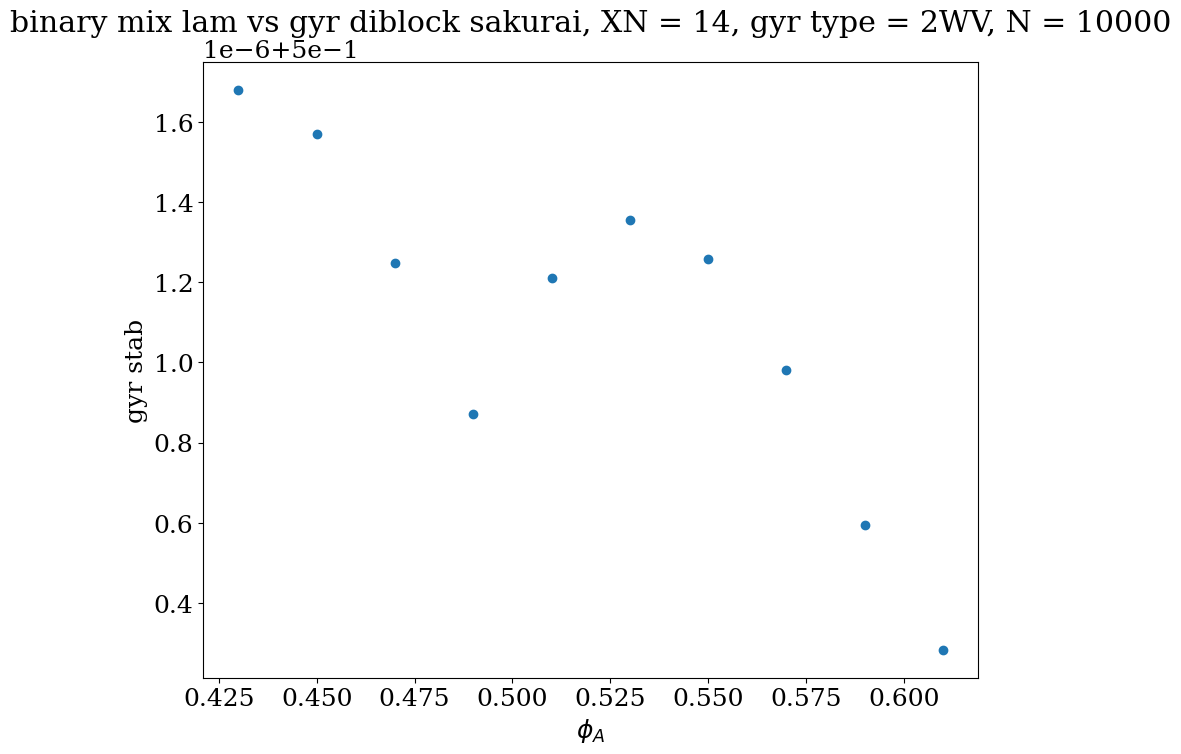

In [157]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

# x = x[np.where(y==13.999999999999988+0j)]
# y = y[np.where(y==13.999999999999988+0j)]
# z = z[np.where(y==13.999999999999988+0j)]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.scatter(x, z)
# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
ax.set_title("binary mix lam vs gyr diblock sakurai, XN = 14, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix lam vs gyr diblock sakurai, gyr type = 2WV, N = 10000')

<Figure size 640x480 with 0 Axes>

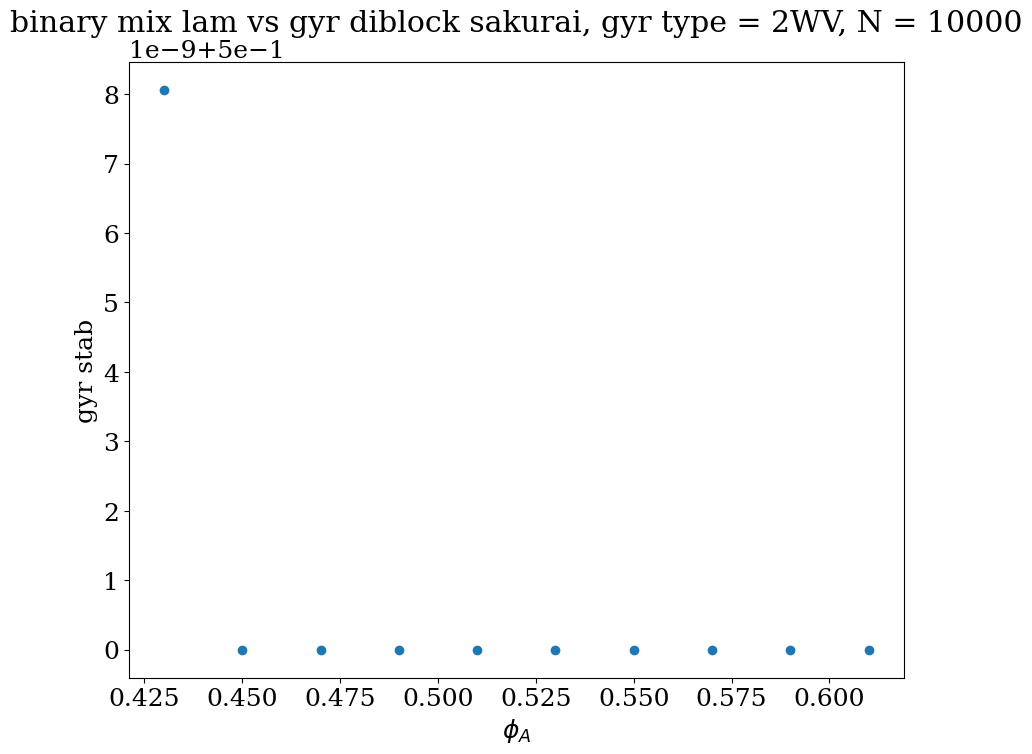

In [149]:
x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

x = x[np.where(y==13.999999999999988+0j)]
y = y[np.where(y==13.999999999999988+0j)]
z = z[np.where(y==13.999999999999988+0j)]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
# ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.scatter(x, z)
# ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_ylabel('gyr stab');
# ax.set_ylim(14, 15)
# ax.set_zlim(0.49999, 0.500014)
ax.set_title("binary mix lam vs gyr diblock sakurai, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 0.92, 'binary mix lam vs gyr diblock sakurai, gyr type = 2WV, N = 10000')

<Figure size 640x480 with 0 Axes>

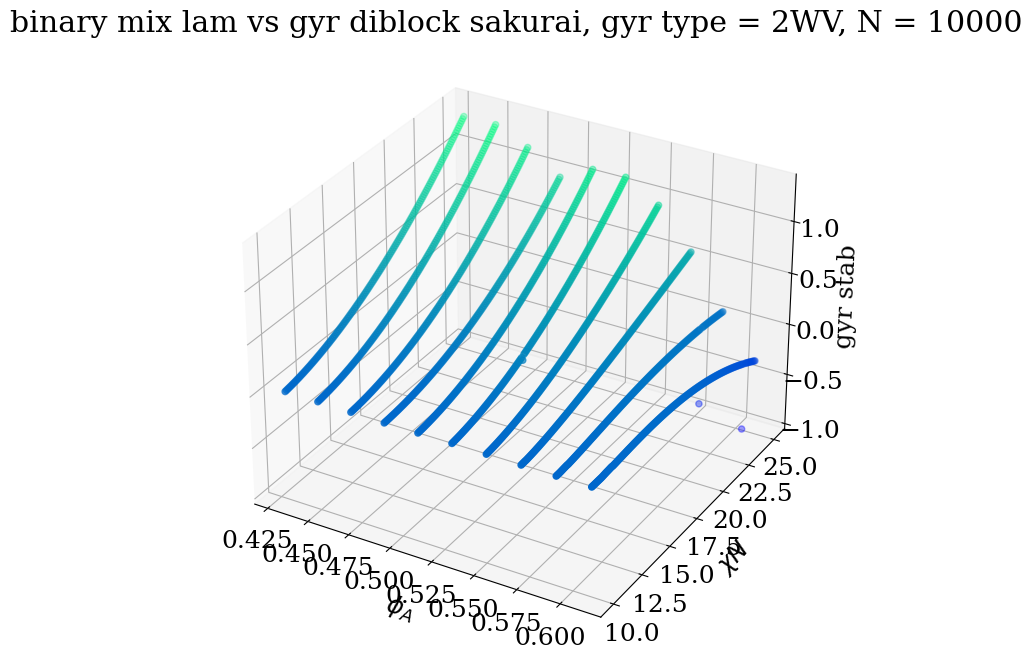

In [148]:

x = rel_gyr_stab_arr[::3]
y = rel_gyr_stab_arr[1::3]
z = rel_gyr_stab_arr[2::3]

# x = z[np.where(y==13.999999999999988+0j)]
# y = y[np.where(y==13.999999999999988+0j)]
# z = z[np.where(y==13.999999999999988+0j)]
# X,Y = np.meshgrid(x, y)

fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
# ax = plt.subplot(111)

# fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, rel_gyr_stab_arr[2::3], 50, cmap='binary')
ax.scatter3D(x, y , z, c=z, cmap='winter')
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_zlabel('gyr stab');
# ax.set_ylim(14, 15)
ax.set_zlim(0.49999, 0.500014)
ax.set_title("binary mix lam vs gyr diblock sakurai, gyr type = " + TYPE + ", N = " + str(N))

Text(0.5, 1.0, 'binary mix diblock SAKURAI fa1 = 0.25, fa2 = 0.65, gyr type = AKS my g4mix2, N = 10000')

<Figure size 640x480 with 0 Axes>

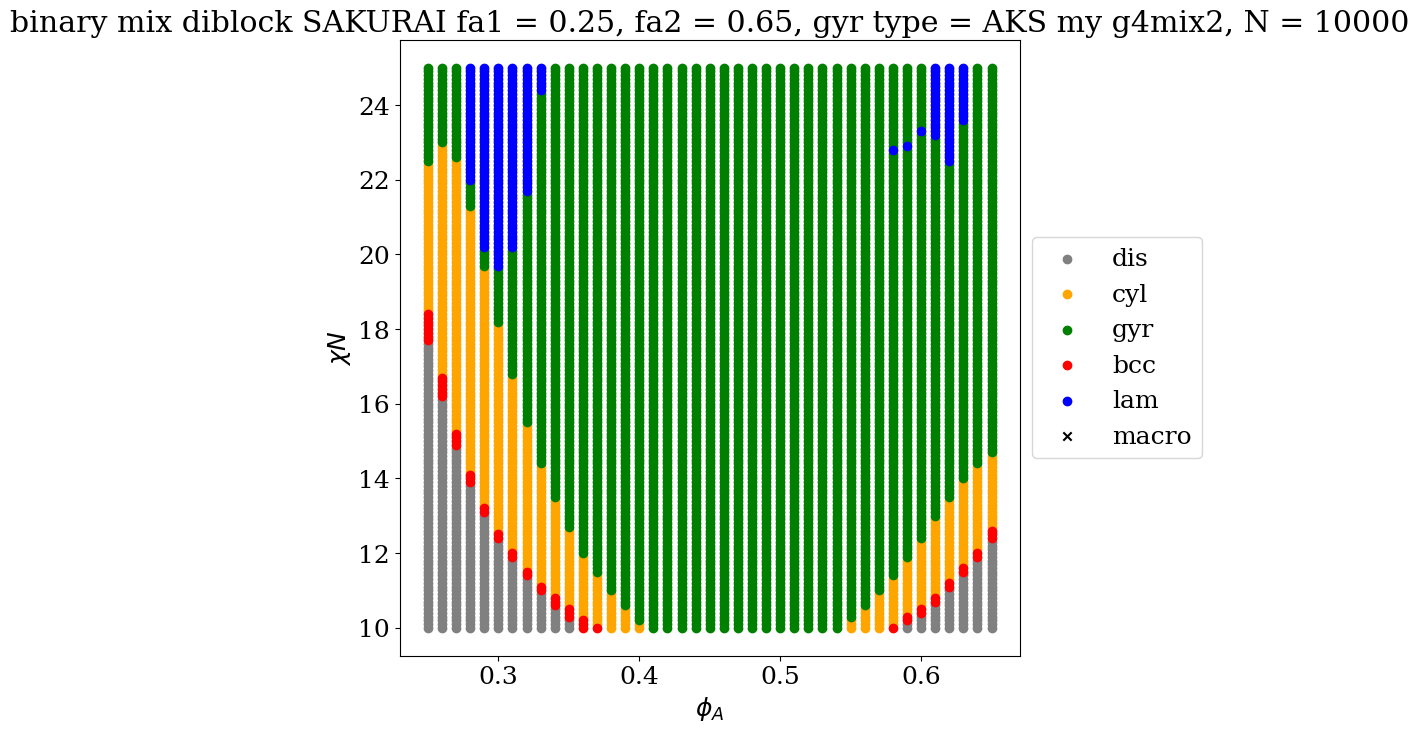

In [57]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("binary mix diblock SAKURAI fa1 = " + str(fa_1) + ", fa2 = " + str(fa_2) + ", gyr type = " + TYPE + " my g4mix2, N = " + str(N) )

Text(0.5, 1.0, 'binary mix diblock dopant .25, gyr type = AKS, N = 10000')

<Figure size 640x480 with 0 Axes>

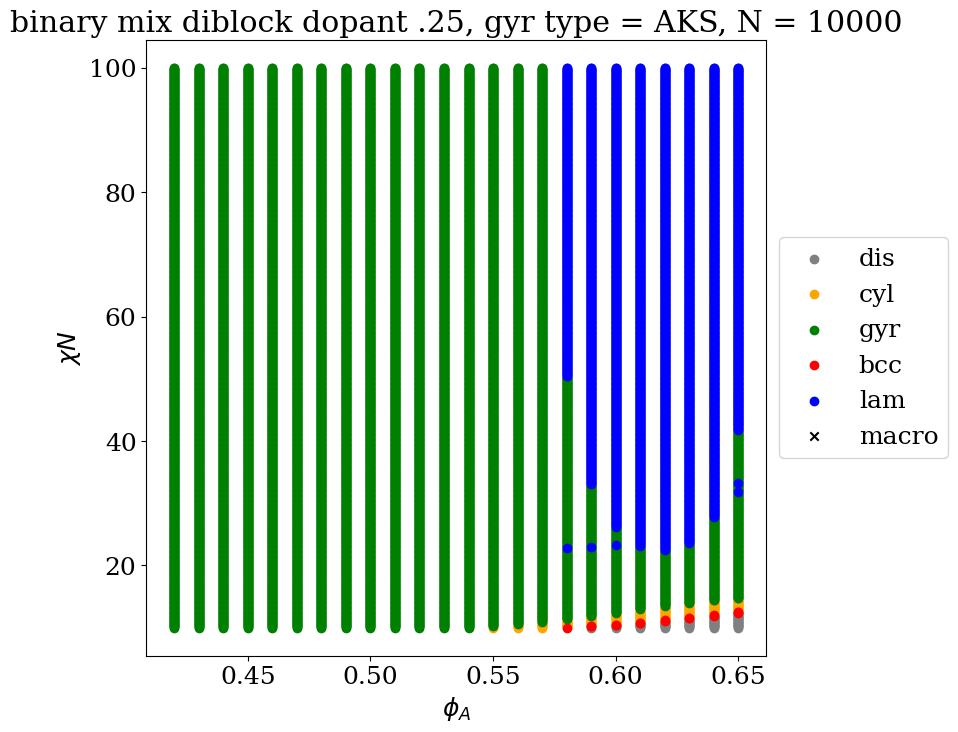

In [69]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("binary mix diblock dopant .25, gyr type = " + TYPE + ", N = " + str(N) )

Text(0.5, 1.0, 'binary mix diblock sakurai, gyr type = MIL, N = 10000')

<Figure size 640x480 with 0 Axes>

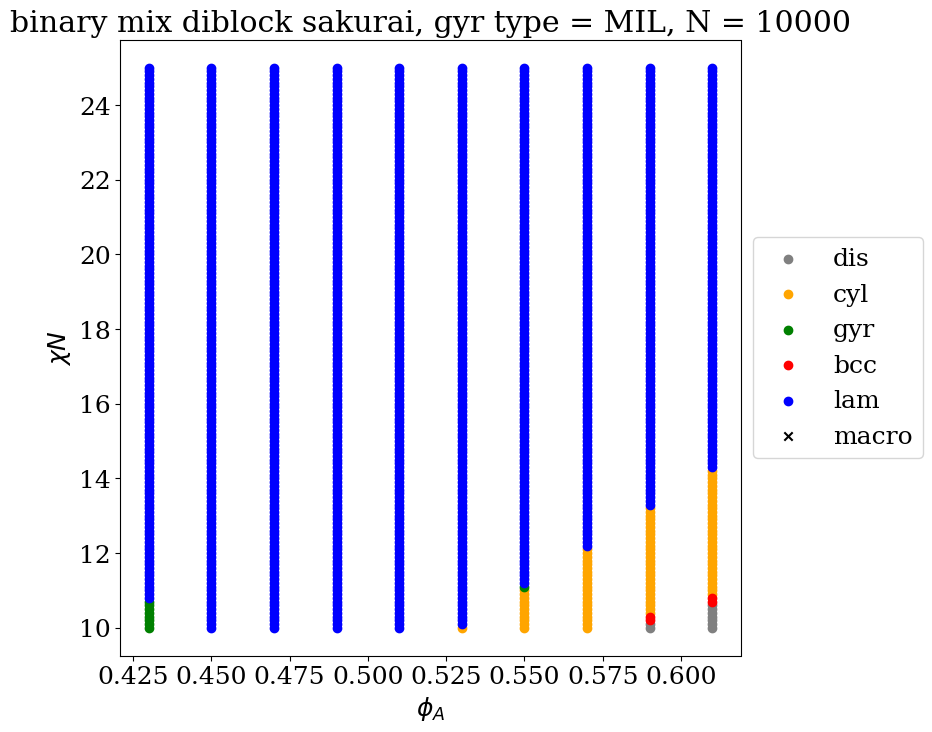

In [5]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$\phi_A$")
ax.set_title("binary mix diblock sakurai, gyr type = " + TYPE + ", N = " + str(N) )

# Mahesh polydisp

In [207]:
# #constants
# N_s = 10000
# poly_s = [0,1,0]
# fB_s = 1/3

# # N_med = 13333
# # poly_m = [0,1,1,0]
# # fB_m =2/4

# N_med = 20000
# poly_m = [0,1,1,1,1,0]
# fB_m = 4/6

# # N_l = 30000
# # poly_l = [0,1,1,1,1,1,1,1,0]
# # fB_l = 7/9

# N_l = 40000
# poly_l = [0,1,1,1,1,1,1,1,1,1,1,0]
# fB_l = 10/12

# #vars; number of each polymer
# num_s = 5
# num_m = 5
# num_l = 5
# num_t = num_s + num_m + num_l

# #calced
# phi_s = (num_s*N_s) / (num_s*N_s + num_m*N_med + num_l*N_l)
# phi_m = (num_m*N_med) / (num_s*N_s + num_m*N_med + num_l*N_l)
# phi_l = (num_l*N_l) / (num_s*N_s + num_m*N_med + num_l*N_l)

# fB = fB_s*phi_s + fB_m*phi_m + fB_l*phi_l

# Mn_B = (fB_s*N_s * (num_s/num_t) ) + (fB_m*N_med * (num_m/num_t) )  + (fB_l*N_l * (num_l/num_t) ) 

# phi_s_b = (num_s*N_s*fB_s) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)
# phi_m_b = (num_m*N_med*fB_m) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)
# phi_l_b = (num_l*N_l*fB_l) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)

# # Mw_B = (fB_s*N_s * phi_s ) + (fB_m*N_med * phi_m )  + (fB_l*N_l * phi_l ) 
# Mw_B = (fB_s*N_s * phi_s_b ) + (fB_m*N_med * phi_m_b )  + (fB_l*N_l * phi_l_b ) 

# PDI_b = Mw_B / Mn_B
# print("phis: ", phi_s, phi_m, phi_l)
# print("f_b: ", fB)
# print("PDI_b: ", PDI_b)

phis:  0.14285714285714285 0.2857142857142857 0.5714285714285714
f_b:  0.7142857142857142
PDI_b:  1.5600000000000005


In [281]:
#need fb 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7

#constants
N_s = 10000
poly_s = [0,1,0]
fB_s = 1/3
N_med = 20000
poly_m = [0,1,1,1,1,0]
fB_m = 4/6
N_l = 40000
poly_l = [0,1,1,1,1,1,1,1,1,1,1,0]
fB_l = 10/12

fb_dict = {}
mx = 21
for ns in range(mx*5):
    for nm in range(mx):
        for nl in range(mx):
            if (ns == nm == nl == 0):
                continue
            #vars; number of each polymer
            num_s = ns
            num_m = nm
            num_l = nl
            num_t = num_s + num_m + num_l

            #calced
            phi_s = (num_s*N_s) / (num_s*N_s + num_m*N_med + num_l*N_l)
            phi_m = (num_m*N_med) / (num_s*N_s + num_m*N_med + num_l*N_l)
            phi_l = (num_l*N_l) / (num_s*N_s + num_m*N_med + num_l*N_l)

            fB = fB_s*phi_s + fB_m*phi_m + fB_l*phi_l

            Mn_B = (fB_s*N_s * (num_s/num_t) ) + (fB_m*N_med * (num_m/num_t) )  + (fB_l*N_l * (num_l/num_t) ) 

            phi_s_b = (num_s*N_s*fB_s) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)
            phi_m_b = (num_m*N_med*fB_m) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)
            phi_l_b = (num_l*N_l*fB_l) / (num_s*N_s*fB_s + num_m*N_med*fB_m + num_l*N_l*fB_l)

            # Mw_B = (fB_s*N_s * phi_s ) + (fB_m*N_med * phi_m )  + (fB_l*N_l * phi_l ) 
            Mw_B = (fB_s*N_s * phi_s_b ) + (fB_m*N_med * phi_m_b )  + (fB_l*N_l * phi_l_b ) 

            PDI_b = Mw_B / Mn_B
            
#             if (1.75< PDI_b < 2.25): # kinda mahesh
            if (1.73< PDI_b < 2.): # MAHESH
#             if (1.1< PDI_b < 1.5): #comparison

                key = np.round(fB, 2)
                if key not in fb_dict.keys():
                    fb_dict[key] = [phi_s, phi_m, phi_l]
#                     print(PDI_b)

fbs = list(fb_dict.keys())
fbs.sort()

In [282]:
%%time
TYPE = "AKS"
# ginzberg criterion, Aksimentiev gyroid (Phase behavior of gradient copolymers Aleksij Aksimentiev; Robert Hołyst)
#constants
N_s = 10000
poly_s = [0,1,0]
fB_s = 1/3
M_s = 3

N_med = 20000
poly_m = [0,1,1,1,1,0]
fB_m = 4/6
M_m = 6

N_l = 40000
poly_l = [0,1,1,1,1,1,1,1,1,1,1,0]
fB_l = 10/12
M_l = 12

poly_mat = [poly_s, poly_m, poly_l]
M_arr = [M_s, M_m, M_l]
N_m = N_s / M_s
b=1

chiN_array = np.arange(0, 30.1, 0.1)

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])
macro_pnts = np.array([])

rel_gyr_stab_arr_gl = np.array([])
rel_gyr_stab_arr_gc = np.array([])
rel_gyr_stab_arr_gb = np.array([])
rel_gyr_stab_arr_glcb = np.array([])

for fb in fbs:
    dens = fb_dict[fb]
    
    mx = Mix(poly_mat, dens, M_arr, N_m, b)

    q_star = mx.q_star
    q_star = q_star[0]

#     if q_star <= 0.01:
    if q_star <= 1/np.sqrt(mx.N*(mx.b**2)):
        #only disorderd or macrophase separation possible
        for CHIN in chiN_array:
            CHI = CHIN / mx.N
            G2 = gamma2_E(mx, q_star, CHI)
            point = np.array([fb,  CHI*mx.N])
            if G2 < 0:
                macro_pnts = np.append(macro_pnts, point)
            elif G2 >= 0:
                dis_pnts = np.append(dis_pnts, point)
    else:
        lam_q = q_star*np.array([1, 0, 0])

        cyl_q1 = q_star*np.array([1, 0, 0])
        cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
        cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
        cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

        bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
        bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
        bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
        bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
        bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
        bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

        sq_6 = (1/np.sqrt(6)) * q_star
        gyr_q1 = sq_6*np.array([-1, 2, 1])
        gyr_q2 = sq_6*np.array([2, 1, -1])
        gyr_q3 = sq_6*np.array([1, -1, 2])
        gyr_q4 = sq_6*np.array([2, -1, -1])
        gyr_q5 = sq_6*np.array([-1, 2, -1])
        gyr_q6 = sq_6*np.array([-1, -1, 2])

        gyr_q7 = sq_6*np.array([2, 1, 1])
        gyr_q8 = sq_6*np.array([1, 2, 1])
        gyr_q9 = sq_6*np.array([1, 1, 2])
        gyr_q10 = sq_6*np.array([2, -1, 1])
        gyr_q11 = sq_6*np.array([1, 2, -1])
        gyr_q12 = sq_6*np.array([-1, 1, 2])
        
        gyr_q1_2 = sq_6*np.array([2, 2, 0])
        gyr_q2_2 = sq_6*np.array([2, 0, 2])
        gyr_q3_2 = sq_6*np.array([0, 2, 2])
        gyr_q4_2 = sq_6*np.array([-2, 2, 0])
        gyr_q5_2 = sq_6*np.array([-2, 0, 2])
        gyr_q6_2 = sq_6*np.array([0, -2, 2])

        sq_cyl_q1 = q_star * np.array([1,0,0])
        sq_cyl_q2 = q_star * np.array([0,1,0])

        sim_cub_q1 = q_star * np.array([1,0,0])
        sim_cub_q2 = q_star * np.array([0,1,0])
        sim_cub_q3 = q_star * np.array([0,0,1])

        fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
        fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
        fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
        fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])


        G3 = gamma3_E(mx, cyl_qs) # all g3s are eqivlaent
        lam_g3 = 0
        cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * G3
        bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(mx, np.array([bcc_q6, bcc_q3, -bcc_q1]))
        gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(mx, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
        gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(mx, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
        gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 24 * gamma3_E(mx, np.array([gyr_q7, -gyr_q4, -gyr_q3_2])) #prevously 72 ??!!

        sq_cyl_g3 = 0
        sim_cub_g3 = 0
        fcc_g3 = 0

        G4_00 = gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(mx, np.array([lam_q, -lam_q, lam_q, -lam_q]))
        cyl_g4 = (1/12)* (G4_00 + \
                  4*gamma4_E(mx, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
        bcc_g4 = (1/24)* (G4_00 \
                         + 8*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                         + 2*gamma4_E(mx, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                         + 4*gamma4_E(mx, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
        gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                           288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                           576*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                           144*gamma4_E(mx, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                           -288*gamma4_E(mx, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
        gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                           288*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                           72*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                           144*gamma4_E(mx, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))
        gyr_g4_mix1 = (1/6) * (1/24) * (1/(6*12)) * (576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                               576*gamma4_E(mx, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                               288*gamma4_E(mx, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))

        gyr_g4_mix2 = (1/4) * (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(mx, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                               -576*gamma4_E(mx, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                               -576*gamma4_E(mx, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))


        G4_90deg = gamma4_E(mx, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
        sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                      24*G4_90deg)
        sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                       72*G4_90deg)
        fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                    + 144*gamma4_E(mx, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                    - 48*gamma4_E(mx, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
        
        for CHIN in chiN_array:
            CHI = CHIN / mx.N
            lam_g2 = (1/2) * 2 * (1) * gamma2_E(mx, q_star, CHI)                
            cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(mx, q_star, CHI)
            bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(mx, q_star, CHI)
            gyr_g2 = lam_g2
            gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(mx, np.sqrt(4/3)*q_star, CHI)    
            sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(mx, q_star, CHI)
            sim_cub_g2 = lam_g2
            fcc_g2 = lam_g2

            if gyr_g3>0:
                gyr_g3*= -1
            if gyr_g3_2>0:
                gyr_g3_2*= -1
            if gyr_g3_mix<0:
                gyr_g3_mix*= -1

            amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                     amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                     amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                     amps[0]**3 * amps[1] * gyr_g4_mix2), \
                                  [0,0], disp=False)
#             print(amp_g1, amp_g2)
            gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                    amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                    amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                    amp_g1**3 * amp_g2 * gyr_g4_mix2

            amp_l1 = np.real((-3*lam_g3 - np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_l2 = np.real((-3*lam_g3 + np.sqrt(9*lam_g3**2 - 32*lam_g2*lam_g4))/(8*lam_g4))
            amp_c1 = np.real((-3*cyl_g3 - np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_c2 = np.real((-3*cyl_g3 + np.sqrt(9*cyl_g3**2 - 32*cyl_g2*cyl_g4))/(8*cyl_g4))
            amp_bcc1 = np.real((-3*bcc_g3 - np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
            amp_bcc2 = np.real((-3*bcc_g3 + np.sqrt(9*bcc_g3**2 - 32*bcc_g2*bcc_g4))/(8*bcc_g4))
#             amp_g1 = np.real((-3*gyr_g3 - np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
#             amp_g2 = np.real((-3*gyr_g3 + np.sqrt(9*gyr_g3**2 - 32*gyr_g2*gyr_g4))/(8*gyr_g4))
            amp_sq_c1 = np.real((-3*sq_cyl_g3 - np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sq_c2 = np.real((-3*sq_cyl_g3 + np.sqrt(9*sq_cyl_g3**2 - 32*sq_cyl_g2*sq_cyl_g4))/(8*sq_cyl_g4))
            amp_sim_cub1 = np.real((-3*sim_cub_g3 - np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_sim_cub2 = np.real((-3*sim_cub_g3 + np.sqrt(9*sim_cub_g3**2 - 32*sim_cub_g2*sim_cub_g4))/(8*sim_cub_g4))
            amp_fcc1 = np.real((-3*fcc_g3 - np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))
            amp_fcc2 = np.real((-3*fcc_g3 + np.sqrt(9*fcc_g3**2 - 32*fcc_g2*fcc_g4))/(8*fcc_g4))

            lamF_1 = np.real(amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 )
            cylF_1 = np.real(amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 )
            bccF_1 = np.real(amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4)
#             gyrF_1 = np.real(amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4)
            sq_cylF_1 = np.real(amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 )
            sim_cubF_1 = np.real(amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 )
            fccF_1 = np.real(amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4)

            lamF_2 = np.real(amp_l2**2 * lam_g2 + amp_l2**3 * lam_g3 + amp_l2**4 * lam_g4)
            cylF_2 = np.real(amp_c2**2 * cyl_g2 + amp_c2**3 * cyl_g3 + amp_c2**4 * cyl_g4 )
            bccF_2 = np.real(amp_bcc2**2 * bcc_g2 + amp_bcc2**3 * bcc_g3 + amp_bcc2**4 * bcc_g4)
#             gyrF_2 = np.real(amp_g2**2 * gyr_g2 + amp_g2**3 * gyr_g3 + amp_g2**4 * gyr_g4)
            sq_cylF_2 = np.real(amp_sq_c2**2 * sq_cyl_g2 + amp_sq_c2**3 * sq_cyl_g3 + amp_sq_c2**4 * sq_cyl_g4)
            sim_cubF_2 = np.real(amp_sim_cub2**2 * sim_cub_g2 + amp_sim_cub2**3 * sim_cub_g3 + amp_sim_cub2**4 * sim_cub_g4 )
            fccF_2 = np.real(amp_fcc2**2 * fcc_g2 + amp_fcc2**3 * fcc_g3 + amp_fcc2**4 * fcc_g4)

            lamF = min(lamF_1, lamF_2)
            cylF = min(cylF_1, cylF_2)
            bccF = min(bccF_1, bccF_2)
#             gyrF = min(gyrF_1, gyrF_2)
            sq_cylF = min(sq_cylF_1, sq_cylF_2)
            sim_cubF = min(sim_cubF_1, sim_cubF_2)
            fccF = min(fccF_1, fccF_2)
            
            point = np.array([fb, CHI*mx.N])
            
            # gyr relative stability analysis
            rel_gyr_stab_gl = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-lamF))#+ np.exp(-cylF)  + np.exp(-bccF))
            rel_gyr_stab_gc = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-cylF))#+ np.exp()  + np.exp(-bccF))
            rel_gyr_stab_gb = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-bccF))#+ np.exp(-cylF)  + np.exp())
            rel_gyr_stab_glcb = np.exp(-gyrF) / (np.exp(-gyrF) + np.exp(-lamF)+ np.exp(-cylF)  + np.exp(-bccF))
            rel_point_gl = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gl])
            rel_point_gc = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gc])
            rel_point_gb = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_gb])
            rel_point_glcb = np.array([phi_bar, CHI*mx.N, rel_gyr_stab_glcb])
            rel_gyr_stab_arr_gl = np.append(rel_gyr_stab_arr_gl, rel_point_gl)
            rel_gyr_stab_arr_gc = np.append(rel_gyr_stab_arr_gc, rel_point_gc)
            rel_gyr_stab_arr_gb = np.append(rel_gyr_stab_arr_gb, rel_point_gb)
            rel_gyr_stab_arr_glcb = np.append(rel_gyr_stab_arr_glcb, rel_point_glcb)
            
            minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
    #         print(lamF)
            if minF >= 0:
                dis_pnts = np.append(dis_pnts, point)
            elif minF == lamF:
                lam_pnts = np.append(lam_pnts, point) 
            elif minF == cylF:
                cyl_pnts = np.append(cyl_pnts, point)
            elif minF == bccF:
                bcc_pnts = np.append(bcc_pnts, point)
            elif minF == gyrF:
                gyr_pnts = np.append(gyr_pnts, point)
            elif minF == sq_cylF:
                sq_cyl_pnts = np.append(sq_cyl_pnts, point)
            elif minF == sim_cubF:
                sim_cub_pnts = np.append(sim_cub_pnts, point)
            elif minF == fccF:
                fcc_pnts = np.append(fcc_pnts, point)
            else:
                raise Exception("error in min F phase assignment")
    print("one fb done")

one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
one fb done
CPU times: total: 1min 1s
Wall time: 1min 26s


Text(0.5, 1.0, 'polyd diblock mahesh PDI 1.73 - 2, gyr type = AKS')

<Figure size 640x480 with 0 Axes>

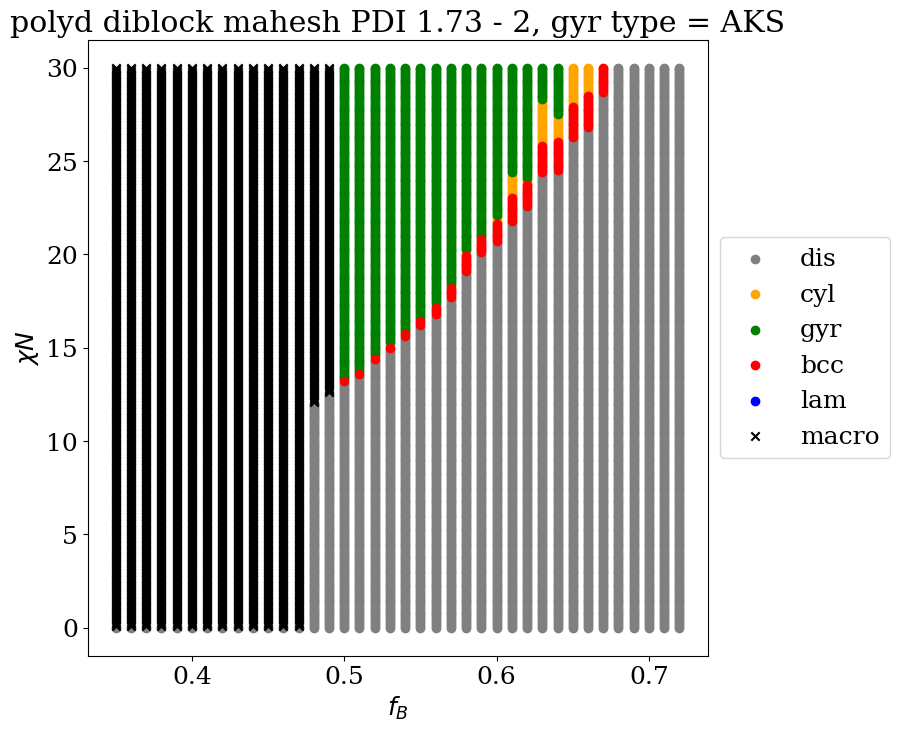

In [283]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_B$")
ax.set_title("polyd diblock mahesh PDI 1.73 - 2, gyr type = " + TYPE )

Text(0.5, 1.0, 'polyd diblock PDI 1.1 - 1.5, gyr type = AKS')

<Figure size 640x480 with 0 Axes>

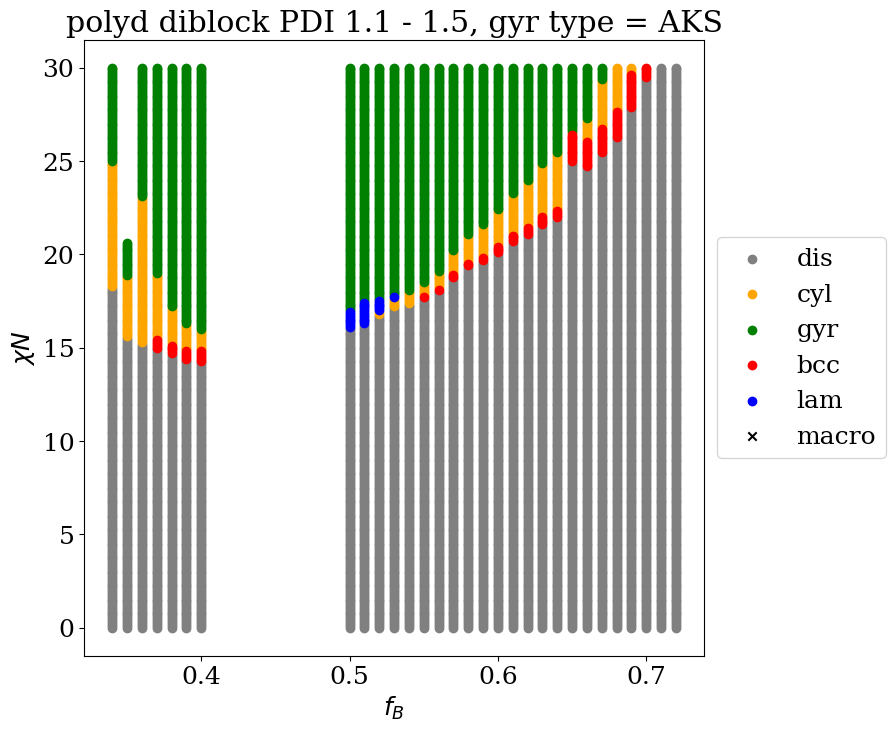

In [277]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_B$")
ax.set_title("polyd diblock PDI 1.1 - 1.5, gyr type = " + TYPE )

Text(0.5, 1.0, 'polyd diblock mahesh, gyr type = AKS')

<Figure size 640x480 with 0 Axes>

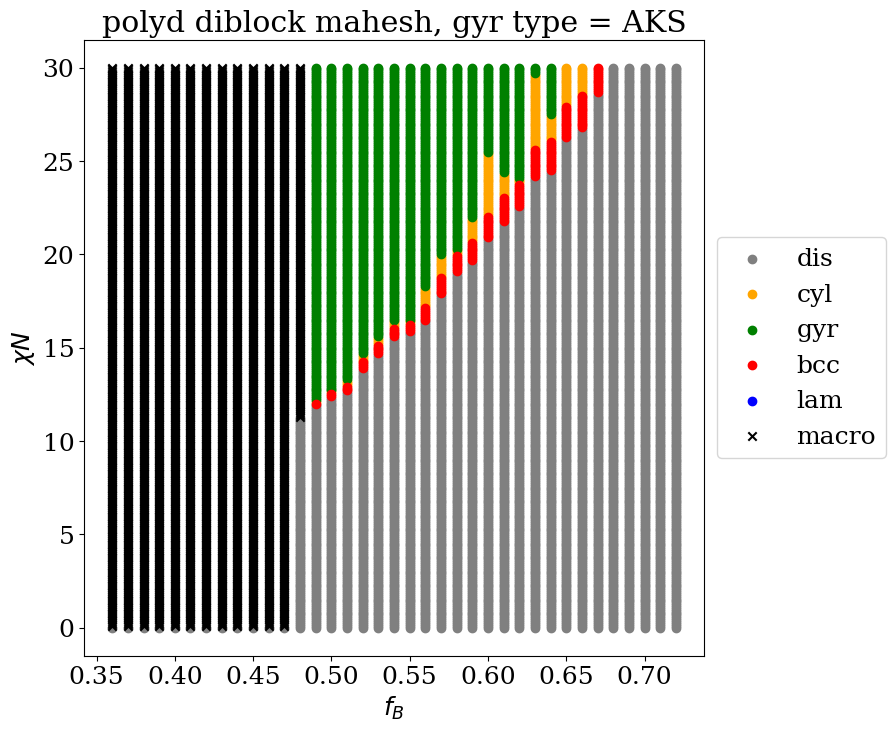

In [258]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")
ax.scatter(macro_pnts[::2], macro_pnts[1::2], label = "macro", color = "black", marker = "x")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_B$")
ax.set_title("polyd diblock mahesh, gyr type = " + TYPE )

In [ ]:
# other gyroid phases in two wavemode leibler theory? YES< GOOD to try
# other published binary mixes in weak segregation regime? NO- b/c withough gyroid we essentially match this result. SO must be
                                                            # issue with gyroid phase represntation